# **Chocolet Sales Data Analysis:**

**Source:** __https://www.kaggle.com/datasets/atharvasoundankar/chocolate-sales__

In [343]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn as slr

### 1. **Data Processing:**

In [344]:
data= pd.read_csv("C:/Users/MyMachine/Desktop/Mission-Project/00_DataSets/22_Chocolate Sales_DataSet.csv")

In [345]:
data.shape

(1094, 6)

In [346]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')

In [347]:
data["Date"].sample(10)

921    04-Aug-22
248    01-Jun-22
995    13-Apr-22
535    09-Aug-22
567    16-May-22
443    16-May-22
118    21-Feb-22
839    21-Jul-22
314    06-Apr-22
112    05-Jan-22
Name: Date, dtype: object

The columns we are working with this project are: 
`'Sales Person'`, `'Country'`, `'Product'`, `'Date'`, `'Amount'`, `'Boxes Shipped'`

In [348]:
data.head(5)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [349]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


The `Amount` column type should be in `Float`, `Date` should be in `DateTime` format.

In [350]:
data.head(2)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94


In [351]:
# convert Date column to datetime data format:
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\MyMachine\AppData\Local\Temp\ipykernel_3960\1189097140.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [352]:
data["Date"].dtypes

dtype('<M8[ns]')

In [353]:
# Now, In Amount column, Remove $ sign and convert it to float. Then change column 
# name and make it Amount_d to indicate that amount is in Dollers:
data['Amount_d'] = data['Amount'].str.replace('$', '')

In [354]:
# Delete Amount column:
#data.drop('Amount', axis=1, inplace=True)

In [355]:
# Ensure all non-numeric characters are removed
data['Amount_d'] = data['Amount_d'].str.replace(',', '', regex=True)  # Remove commas
data['Amount_d'] = data['Amount_d'].str.strip()  # Remove leading/trailing spaces

# Convert to float
data['Amount_d'] = data['Amount_d'].astype(float)

In [356]:
data.dtypes

Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                   object
Boxes Shipped             int64
Amount_d                float64
dtype: object

So, datatypes are adjusted for the respective columns. Next step is to check for the null values and duplicate entries. If found we will handle them accordingly.

In [357]:
data.isnull().any()

Sales Person     False
Country          False
Product          False
Date             False
Amount           False
Boxes Shipped    False
Amount_d         False
dtype: bool

So, No-Null values are there.

In [358]:
data.duplicated().any()

np.False_

And, no duplicate entries in the dataset.

The next step is to create new columns (e.g., `month`, `year`, `day of week`, `quarter`) from Date column for further analysis.

In [359]:
# Extract month, year, day of the week, and quarter from the Date column
data['month'] = data['Date'].dt.month  # Extract month
data['year'] = data['Date'].dt.year    # Extract year
data['day_of_week'] = data['Date'].dt.day_name()  # Extract day of the week
data['quarter'] = data['Date'].dt.quarter  # Extract quarter

# Display the updated DataFrame
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180,5320.0,1,2022,Tuesday,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94,7896.0,8,2022,Monday,3
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91,4501.0,7,2022,Thursday,3
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,"$12,726",342,12726.0,4,2022,Wednesday,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,"$13,685",184,13685.0,2,2022,Thursday,1


In [360]:
# In month column replace numbers by month names:
data['month'] = data['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [361]:
data

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180,5320.0,Jan,2022,Tuesday,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94,7896.0,Aug,2022,Monday,3
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91,4501.0,Jul,2022,Thursday,3
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,"$12,726",342,12726.0,Apr,2022,Wednesday,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,"$13,685",184,13685.0,Feb,2022,Thursday,1
...,...,...,...,...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,"$4,410",323,4410.0,May,2022,Tuesday,2
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,"$6,559",119,6559.0,Jun,2022,Tuesday,2
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,$574,217,574.0,Jul,2022,Tuesday,3
1092,Dotty Strutley,India,Eclairs,2022-07-28,"$2,086",384,2086.0,Jul,2022,Thursday,3


In [362]:
data.dtypes

Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                   object
Boxes Shipped             int64
Amount_d                float64
month                    object
year                      int32
day_of_week              object
quarter                   int32
dtype: object

-----

### 2. **Exploratory Data Analysis (EDA):**

### 1. **Univariate analysis (distributions of each column):**

In [363]:
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180,5320.0,Jan,2022,Tuesday,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94,7896.0,Aug,2022,Monday,3
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91,4501.0,Jul,2022,Thursday,3
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,"$12,726",342,12726.0,Apr,2022,Wednesday,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,"$13,685",184,13685.0,Feb,2022,Thursday,1


To find the Most successful Sales Person:

In [364]:
data["Sales Person"].mode()[0]

'Kelci Walkden'

In [365]:
print(F"The Most Successful Sales Person is: {data["Sales Person"].mode()[0]}")

The Most Successful Sales Person is: Kelci Walkden


In [366]:
data["Country"].nunique()

6

In [367]:
data["Country"].mode()[0]

'Australia'

In [368]:
country_data= data["Country"].value_counts().sort_index(ascending=True)

In [369]:
country_data= country_data.to_frame()

In [370]:
country_data

,count
Country,
Australia,205
Canada,175
India,184
New Zealand,173
UK,178
USA,179


So, In the dataset, Austrelia is the country where the company is selling the most products followed by Canada and India. The company's sales performance is comparatively weak in USA as the dataset shows the least sales.

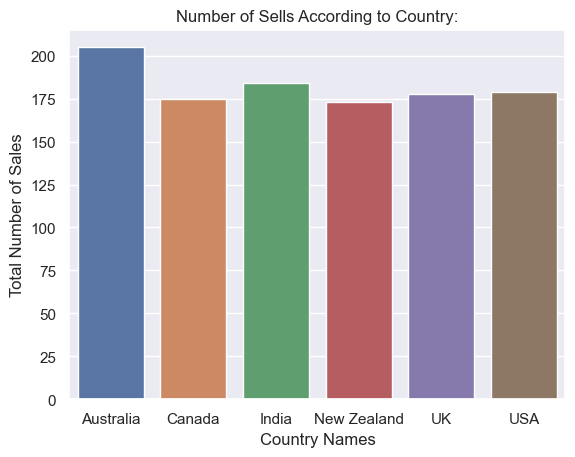

In [371]:
sns.barplot(data= country_data, x= "Country", y= "count", palette= 'deep', hue= "Country", legend= False)
plt.title("Number of Sells According to Country:")
plt.xlabel("Country Names")
plt.ylabel("Total Number of Sales")
plt.show()

In [372]:
data.head(5)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180,5320.0,Jan,2022,Tuesday,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94,7896.0,Aug,2022,Monday,3
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91,4501.0,Jul,2022,Thursday,3
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,"$12,726",342,12726.0,Apr,2022,Wednesday,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,"$13,685",184,13685.0,Feb,2022,Thursday,1


Find out all the distinct products that is being sold by the company:

In [373]:
products= data["Product"].value_counts()

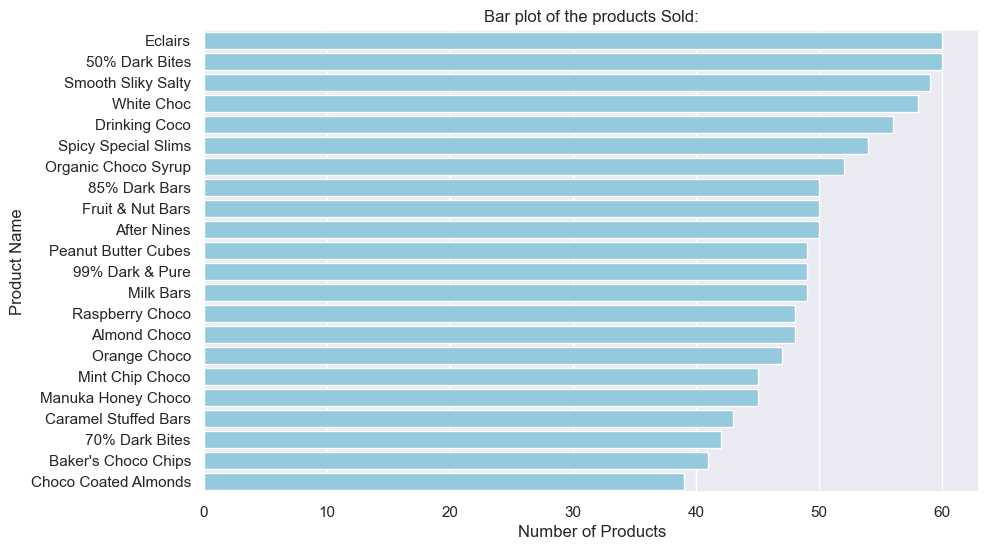

In [374]:
# Bar plot of the products:
plt.figure(figsize=(10,6))
sns.barplot(data= products.to_frame(), y= products.index, x= products.values, color='skyblue')
plt.title('Bar plot of the products Sold:')
plt.xlabel("Number of Products")
plt.ylabel("Product Name")
plt.show()

Most sold product accross all countries:

In [375]:
data["Product"].mode()[0]

'50% Dark Bites'

Most Sold Product accross Australia:

In [376]:
aus_data= data[data["Country"]== "Australia"]

In [377]:
aus_data["Product"].mode()[0]

'50% Dark Bites'

Least sold Product across Australia:

In [378]:
aus_data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,"$12,726",342,12726.0,Apr,2022,Wednesday,2
7,Gunar Cockshoot,Australia,After Nines,2022-03-24,"$3,080",73,3080.0,Mar,2022,Thursday,1
9,Brien Boise,Australia,99% Dark & Pure,2022-07-04,"$2,835",102,2835.0,Jul,2022,Monday,3
15,Beverie Moffet,Australia,Organic Choco Syrup,2022-01-26,"$6,790",356,6790.0,Jan,2022,Wednesday,1
20,Brien Boise,Australia,Eclairs,2022-06-27,"$6,888",88,6888.0,Jun,2022,Monday,2


In [379]:
aus_data.groupby(by= "Product")["Product"].value_counts().sort_values(ascending=True)

Product
Choco Coated Almonds     6
Peanut Butter Cubes      6
Mint Chip Choco          7
Caramel Stuffed Bars     7
After Nines              7
Orange Choco             8
85% Dark Bars            8
Manuka Honey Choco       8
Smooth Sliky Salty       8
Spicy Special Slims      8
Fruit & Nut Bars         9
70% Dark Bites           9
Baker's Choco Chips      9
Eclairs                 10
Milk Bars               11
99% Dark & Pure         11
White Choc              11
Raspberry Choco         11
Almond Choco            11
Drinking Coco           12
Organic Choco Syrup     12
50% Dark Bites          16
Name: count, dtype: int64

So, `Choco Coated Almonds` and `Peanut Butter Cubes` are the least sold products across Australia.

In [380]:
data.head(3)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180,5320.0,Jan,2022,Tuesday,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94,7896.0,Aug,2022,Monday,3
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91,4501.0,Jul,2022,Thursday,3


To find the total number of boxes shipped across all countries:

In [381]:
data["Boxes Shipped"].sum()

np.int64(177007)

So, 177007 boxes have been sold accross all countries.

To find the distribution of Shipping of Boxes:

<Axes: xlabel='Boxes Shipped', ylabel='Count'>

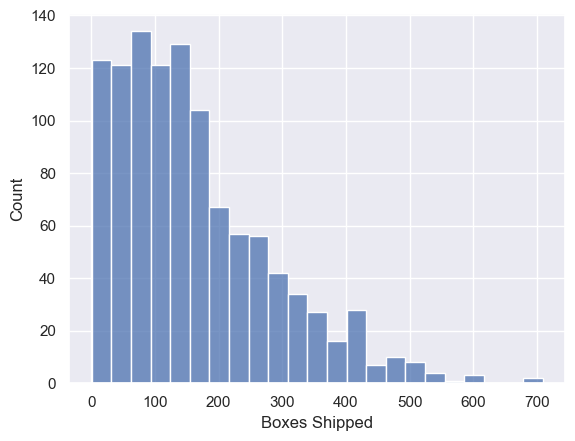

In [382]:
sns.histplot(x= data["Boxes Shipped"])

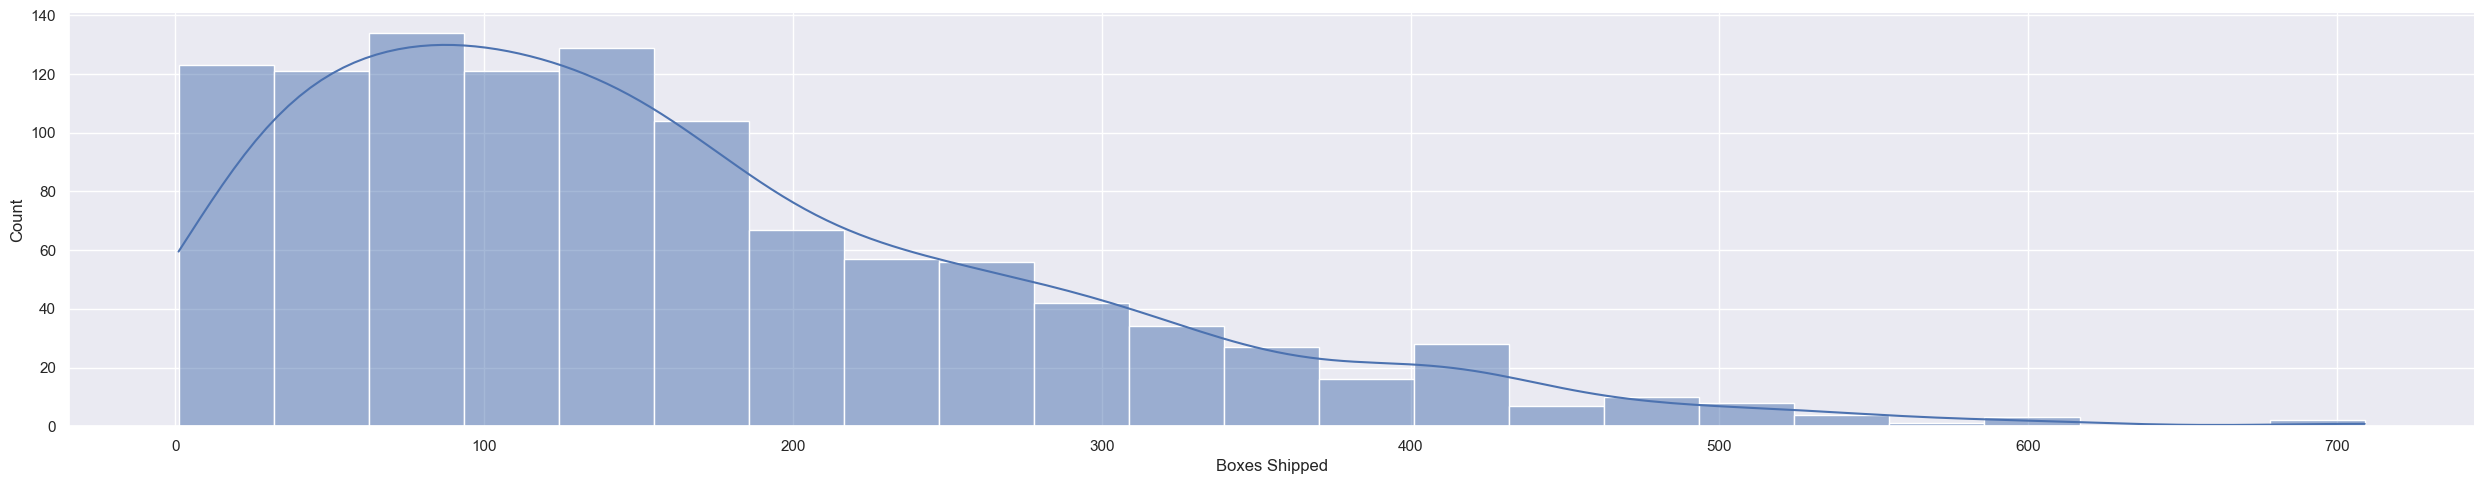

In [383]:
sns.displot(x= data["Boxes Shipped"], kde= True, aspect= 5)

So, The distribution of boxes shipped is highly skewed towards right forming a long Tail. This indicates that as the number of boxes shipped increases, the frequency of occurrence decreases. 

To find the total number of boxes shipped to India:

In [384]:
data[data["Country"]== "India"]["Boxes Shipped"].sum()

np.int64(29470)

So, a total of 29470 boxes have been shipped to India.

In [385]:
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180,5320.0,Jan,2022,Tuesday,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94,7896.0,Aug,2022,Monday,3
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91,4501.0,Jul,2022,Thursday,3
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,"$12,726",342,12726.0,Apr,2022,Wednesday,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,"$13,685",184,13685.0,Feb,2022,Thursday,1


---

Total Revanue the company has made to this date:

In [386]:
data["Amount_d"].sum()

np.float64(6183625.0)

So, a total of $61,83,625.0$ or roughly $62 million worth of products were sold.

I will plot the distribution of `Amount_d` to look for any unusual sales that may have occured in the companie's history:

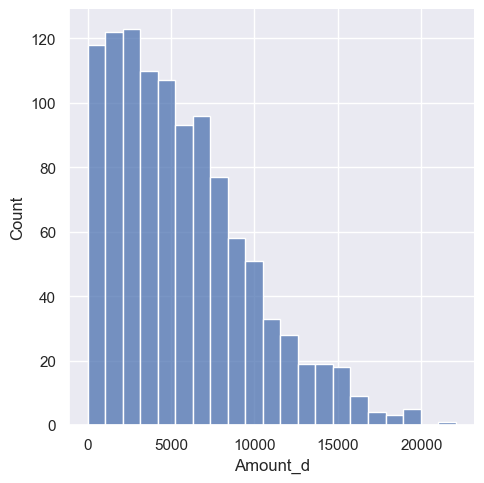

In [387]:
sns.displot(x= data["Amount_d"])

So generally no unusual selling patterns have been detected. Low amount purchases are considerably high comparatively to those few high-amount purchases. This is generally acceptable and so no red flags have been raised.

Finding the maximum and minimum priced products:

In [388]:
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180,5320.0,Jan,2022,Tuesday,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94,7896.0,Aug,2022,Monday,3
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91,4501.0,Jul,2022,Thursday,3
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,"$12,726",342,12726.0,Apr,2022,Wednesday,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,"$13,685",184,13685.0,Feb,2022,Thursday,1


We can not calculate the retail price of each product by just applying simple arithmetic operations because the same product having same boxes sold on different countries have different prices. For this reason, we only calcuate minimum and maximum and average price from thr `Amount_d` column for now.

In [389]:
data["Amount_d"].describe()

count     1094.000000
mean      5652.308044
std       4102.442014
min          7.000000
25%       2390.500000
50%       4868.500000
75%       8027.250000
max      22050.000000
Name: Amount_d, dtype: float64

- **`Count`**: `1094`: This indicates the total number of observations in the dataset.

- **`Mean`**: `5652.31`: The average value of the dataset is approximately 5652.31. This suggests that, on average, the values are relatively high.

- **`Standard Deviation (std)`**: `4102.44`: This measures the dispersion of the data. A standard deviation of 4102.44 indicates a high variability in the dataset, meaning that the values tend to be spread out over a wide range.

- **`Minimum (min)`**: `7`: The lowest value recorded in the dataset is 7, which may represent an outlier or a lower bound for the dataset.

- **`25th Percentile (Q1)`**: `2390.50`: This indicates that 25% of the data points are below 2390.50. It shows that a quarter of the observations are relatively low compared to the rest.

- **`Median (50th Percentile)`**: `4868.50`: The median value, 4868.50, indicates that half of the observations fall below this point. This is a good measure of central tendency that is less affected by outliers.

- **`75th Percentile (Q3)`**: `8027.25`: This value shows that 75% of the data points are below 8027.25, indicating that the upper quartile of data is significantly higher than the lower quartile.

- **`Maximum (max)`**: `22050`: The highest value recorded is 22050, suggesting that there are some very high observations which could be outliers.
  
The dataset displays a right-skewed distribution, as indicated by the mean being higher than the median. The large standard deviation relative to the mean suggests significant variability. The values range from a minimum of 7 to a maximum of 22050, with a notable concentration of values in the lower range (as indicated by the Q1 and median). 

-----------

In [390]:
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180,5320.0,Jan,2022,Tuesday,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94,7896.0,Aug,2022,Monday,3
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91,4501.0,Jul,2022,Thursday,3
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,"$12,726",342,12726.0,Apr,2022,Wednesday,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,"$13,685",184,13685.0,Feb,2022,Thursday,1


To find the month where maximum number of selles occurs:

In [391]:
months_s= data["month"].value_counts()

In [392]:
data["month"].mode() 

0    Jun
Name: month, dtype: object

So, `June` is the Month where maximum number of sells occur. Also, `February` is the month where minimum number of sales occur. There are other four months during which no sells occur in the company's history.

<Axes: xlabel='month'>

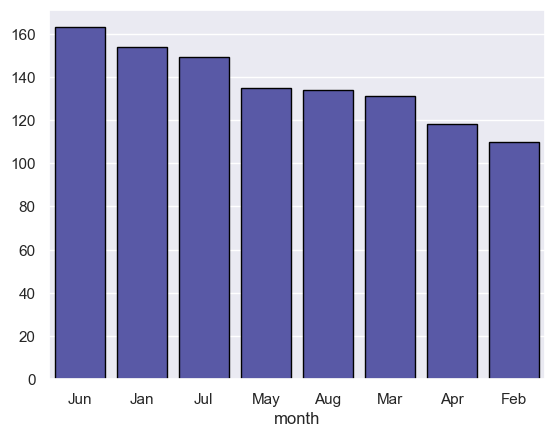

In [393]:
sns.barplot(x= months_s.index, y= months_s.values, color= "blue", saturation= 0.3, edgecolor= "black")

----

Which day of the week is very important for the company in terms of sales?

In [394]:
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180,5320.0,Jan,2022,Tuesday,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94,7896.0,Aug,2022,Monday,3
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91,4501.0,Jul,2022,Thursday,3
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,"$12,726",342,12726.0,Apr,2022,Wednesday,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,"$13,685",184,13685.0,Feb,2022,Thursday,1


In [395]:
data["day_of_week"].mode()

0    Monday
Name: day_of_week, dtype: object

So, During Mondays, the sales are high.

In [396]:
data["day_of_week"].value_counts()

day_of_week
Monday       253
Tuesday      220
Wednesday    220
Thursday     210
Friday       191
Name: count, dtype: int64

The data shows no sells records for Saturday and Sunday(During Weekends). And Sales are maximum for the first day of the week just after holidays indicating desperate buying.

In [397]:
data.dtypes

Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                   object
Boxes Shipped             int64
Amount_d                float64
month                    object
year                      int32
day_of_week              object
quarter                   int32
dtype: object

Here, `quarter` may takes any of the values: 1,2,3,4 and it should be considered as a Catagorical variable. Leaving it to numeric may lead to incorrect results. So, first convert it to object data type.

In [398]:
data["quarter"]= data["quarter"].astype("object")

In [399]:
data["quarter"].dtype

dtype('O')

Good.

Lets see in what quarter there are maximum and minimum sales:

In [400]:
data["quarter"].value_counts()

quarter
2    416
1    395
3    283
Name: count, dtype: int64

And, it shows second quarter is very important as during which higest number of sells happen. There is no data available for the forth quarter indicating no sells.

------

### 2. **Bivariate/multivariate analysis (Relation Between Two or More Columns):**

In [401]:
data

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180,5320.0,Jan,2022,Tuesday,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94,7896.0,Aug,2022,Monday,3
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91,4501.0,Jul,2022,Thursday,3
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,"$12,726",342,12726.0,Apr,2022,Wednesday,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,"$13,685",184,13685.0,Feb,2022,Thursday,1
...,...,...,...,...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,"$4,410",323,4410.0,May,2022,Tuesday,2
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,"$6,559",119,6559.0,Jun,2022,Tuesday,2
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,$574,217,574.0,Jul,2022,Tuesday,3
1092,Dotty Strutley,India,Eclairs,2022-07-28,"$2,086",384,2086.0,Jul,2022,Thursday,3


1. **Most Successful Sales Person for Each Country:**

In [402]:
sales_person_by_country= data.groupby(by= "Country")["Sales Person"].value_counts()

In [403]:
data.groupby(by= "Country")["Sales Person"].value_counts().sum()

np.int64(1094)

In [404]:
sales_person_by_country["Australia"]

Sales Person
Brien Boise            11
Madelene Upcott        11
Dotty Strutley         10
Kaine Padly            10
Curtice Advani          9
Dennison Crosswaite     9
Gigi Bohling            9
Kelci Walkden           9
Mallorie Waber          9
Wilone O'Kielt          9
Beverie Moffet          8
Ches Bonnell            8
Husein Augar            8
Jehu Rudeforth          8
Karlen McCaffrey        8
Rafaelita Blaksland     8
Van Tuxwell             8
Andria Kimpton          7
Camilla Castle          7
Gunar Cockshoot         7
Jan Morforth            7
Marney O'Breen          7
Oby Sorrel              7
Barr Faughny            6
Roddy Speechley         5
Name: count, dtype: int64

So, `Brien Boise`, `Madelene Upcott` are most successful Sales Person for australia having 11 Saleseach. 

In [405]:
sales_person_by_country["USA"]

Sales Person
Dennison Crosswaite    11
Kelci Walkden          11
Gigi Bohling           10
Kaine Padly             9
Barr Faughny            8
Brien Boise             8
Dotty Strutley          8
Karlen McCaffrey        8
Marney O'Breen          8
Roddy Speechley         8
Beverie Moffet          7
Camilla Castle          7
Gunar Cockshoot         7
Husein Augar            7
Madelene Upcott         7
Oby Sorrel              7
Wilone O'Kielt          7
Ches Bonnell            6
Mallorie Waber          6
Van Tuxwell             6
Andria Kimpton          5
Curtice Advani          5
Jehu Rudeforth          5
Rafaelita Blaksland     5
Jan Morforth            3
Name: count, dtype: int64

So, Dennison `Crosswaite`, `Kelci Walkden` are most successful Sales Person for USA having 11 sales for each.

In [406]:
sales_person_by_country["India"]

Sales Person
Jan Morforth           12
Kelci Walkden          12
Van Tuxwell            11
Beverie Moffet         10
Brien Boise            10
Ches Bonnell           10
Curtice Advani          9
Karlen McCaffrey        9
Oby Sorrel              9
Roddy Speechley         9
Dennison Crosswaite     8
Gunar Cockshoot         7
Husein Augar            7
Marney O'Breen          7
Andria Kimpton          6
Jehu Rudeforth          6
Barr Faughny            5
Camilla Castle          5
Dotty Strutley          5
Gigi Bohling            5
Mallorie Waber          5
Rafaelita Blaksland     5
Wilone O'Kielt          5
Madelene Upcott         4
Kaine Padly             3
Name: count, dtype: int64

`Jan Morforth` `Kelci Walkden` are most successful sales person for India.

2. **Persons having lest effective SalesMan Strategy:**

In [407]:
data["Sales Person"].value_counts(ascending= True)

Sales Person
Camilla Castle         32
Rafaelita Blaksland    34
Wilone O'Kielt         34
Dotty Strutley         36
Husein Augar           38
Andria Kimpton         39
Jan Morforth           39
Mallorie Waber         41
Barr Faughny           43
Roddy Speechley        43
Gunar Cockshoot        43
Jehu Rudeforth         43
Marney O'Breen         45
Madelene Upcott        45
Kaine Padly            45
Curtice Advani         46
Gigi Bohling           47
Karlen McCaffrey       47
Ches Bonnell           48
Oby Sorrel             49
Dennison Crosswaite    49
Beverie Moffet         50
Van Tuxwell            51
Brien Boise            53
Kelci Walkden          54
Name: count, dtype: int64

Camilla Castle have lowset number of sales: 32 but just by this we can not say that he is unsuccessful. Because, Kelci Walkden whose sales count is 54. The difference in successfull sales count for these two sales person is not that extreme. So, they are doing well in their respective sales and further factors should be considered before making final decisions. 

In [408]:
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180,5320.0,Jan,2022,Tuesday,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94,7896.0,Aug,2022,Monday,3
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91,4501.0,Jul,2022,Thursday,3
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,"$12,726",342,12726.0,Apr,2022,Wednesday,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,"$13,685",184,13685.0,Feb,2022,Thursday,1


3. **To check if a Sales Person is Dealing in More than one Countries:**

In [409]:
data.groupby(by= "Sales Person")["Country"].value_counts()

Sales Person    Country    
Andria Kimpton  Canada         9
                Australia      7
                India          6
                New Zealand    6
                UK             6
                              ..
Wilone O'Kielt  New Zealand    8
                USA            7
                India          5
                UK             3
                Canada         2
Name: count, Length: 150, dtype: int64

So, we can conclude that `Yes`, a single sales person can be involved in multiple countries in selling the Products.

4. **Which Product is performing Well and Where?**

In [410]:
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180,5320.0,Jan,2022,Tuesday,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94,7896.0,Aug,2022,Monday,3
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91,4501.0,Jul,2022,Thursday,3
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,"$12,726",342,12726.0,Apr,2022,Wednesday,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,"$13,685",184,13685.0,Feb,2022,Thursday,1


In [411]:
data["Country"].unique()

array(['UK', 'India', 'Australia', 'New Zealand', 'USA', 'Canada'],
      dtype=object)

In [412]:
data["Product"].unique()

array(['Mint Chip Choco', '85% Dark Bars', 'Peanut Butter Cubes',
       'Smooth Sliky Salty', '99% Dark & Pure', 'After Nines',
       '50% Dark Bites', 'Orange Choco', 'Eclairs', 'Drinking Coco',
       'Organic Choco Syrup', 'Milk Bars', 'Spicy Special Slims',
       'Fruit & Nut Bars', 'White Choc', 'Manuka Honey Choco',
       'Almond Choco', 'Raspberry Choco', 'Choco Coated Almonds',
       "Baker's Choco Chips", 'Caramel Stuffed Bars', '70% Dark Bites'],
      dtype=object)

In [413]:
data_by_cont= data.groupby(by= "Country")["Product"].value_counts()

In [414]:
data_by_cont["Australia"].head()

Product
50% Dark Bites         16
Drinking Coco          12
Organic Choco Syrup    12
99% Dark & Pure        11
Almond Choco           11
Name: count, dtype: int64

In [415]:
data_by_cont["UK"].head()

Product
50% Dark Bites        12
Drinking Coco         12
White Choc            12
99% Dark & Pure       11
Smooth Sliky Salty    11
Name: count, dtype: int64

In [416]:
data_by_cont["India"].head(3)

Product
Eclairs                15
Spicy Special Slims    14
Smooth Sliky Salty     11
Name: count, dtype: int64

In [417]:
data_by_cont["Canada"].head(3)

Product
Smooth Sliky Salty      12
Spicy Special Slims     11
Choco Coated Almonds    10
Name: count, dtype: int64

In [418]:
data_by_cont["USA"].head(3)

Product
Fruit & Nut Bars    12
50% Dark Bites      11
Orange Choco        11
Name: count, dtype: int64

In [419]:
data_by_cont["New Zealand"].head(3)

Product
Mint Chip Choco    14
85% Dark Bars      12
After Nines        12
Name: count, dtype: int64

In [420]:
data.head(4)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180,5320.0,Jan,2022,Tuesday,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94,7896.0,Aug,2022,Monday,3
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91,4501.0,Jul,2022,Thursday,3
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,"$12,726",342,12726.0,Apr,2022,Wednesday,2


6. **What is the relation between Price and the Country it is sold:**

In [421]:
data["Product"].unique()

array(['Mint Chip Choco', '85% Dark Bars', 'Peanut Butter Cubes',
       'Smooth Sliky Salty', '99% Dark & Pure', 'After Nines',
       '50% Dark Bites', 'Orange Choco', 'Eclairs', 'Drinking Coco',
       'Organic Choco Syrup', 'Milk Bars', 'Spicy Special Slims',
       'Fruit & Nut Bars', 'White Choc', 'Manuka Honey Choco',
       'Almond Choco', 'Raspberry Choco', 'Choco Coated Almonds',
       "Baker's Choco Chips", 'Caramel Stuffed Bars', '70% Dark Bites'],
      dtype=object)

In [422]:
mcc= data[data["Product"]== "Mint Chip Choco"]

<Axes: xlabel='Country', ylabel='Amount_d'>

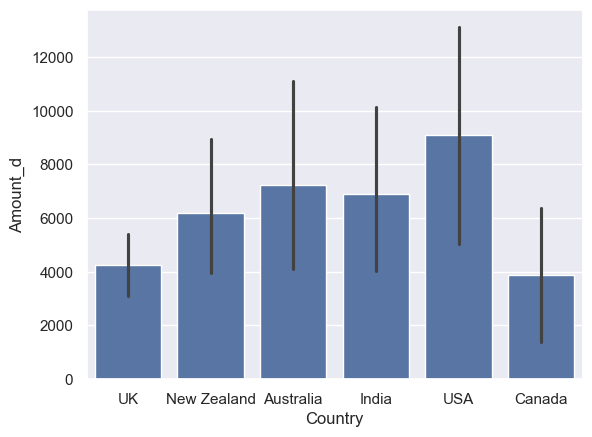

In [423]:
sns.barplot(data= mcc, x= "Country", y= "Amount_d")

<Axes: xlabel='Country', ylabel='Amount_d'>

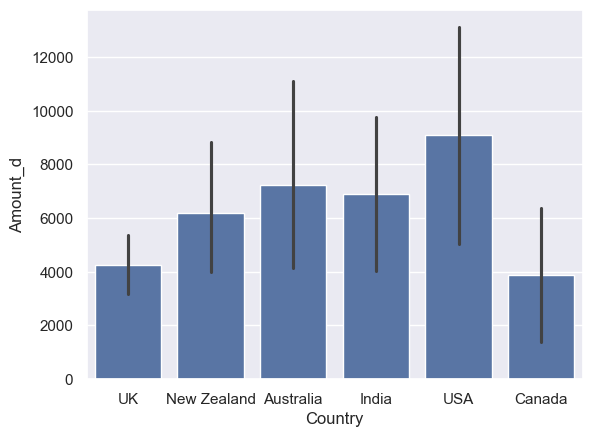

In [424]:
db= data[data["Product"]== "85% Dark Bars"]
sns.barplot(data= mcc, x= "Country", y= "Amount_d") 

<Axes: xlabel='Country', ylabel='Amount_d'>

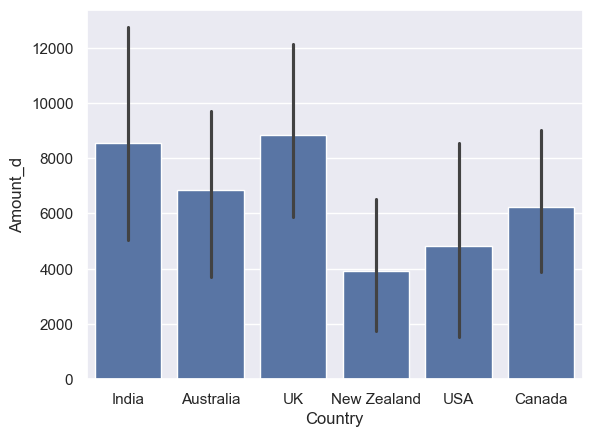

In [425]:
db= data[data["Product"]== "Peanut Butter Cubes"]
sns.barplot(data= db, x= "Country", y= "Amount_d")

----

6. **Boxes Shipped vs. Country:**

In [426]:
data

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180,5320.0,Jan,2022,Tuesday,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94,7896.0,Aug,2022,Monday,3
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91,4501.0,Jul,2022,Thursday,3
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,"$12,726",342,12726.0,Apr,2022,Wednesday,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,"$13,685",184,13685.0,Feb,2022,Thursday,1
...,...,...,...,...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,"$4,410",323,4410.0,May,2022,Tuesday,2
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,"$6,559",119,6559.0,Jun,2022,Tuesday,2
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,$574,217,574.0,Jul,2022,Tuesday,3
1092,Dotty Strutley,India,Eclairs,2022-07-28,"$2,086",384,2086.0,Jul,2022,Thursday,3


In [427]:
da=data.groupby(by= "Country")["Boxes Shipped"].sum()

In [428]:
da

Country
Australia      32647
Canada         31221
India          29470
New Zealand    26580
UK             30265
USA            26824
Name: Boxes Shipped, dtype: int64

In [429]:
da.values.sum() # np.int64(177007)
data["Boxes Shipped"].sum() # np.int64(177007) 

np.int64(177007)

<Axes: xlabel='Country'>

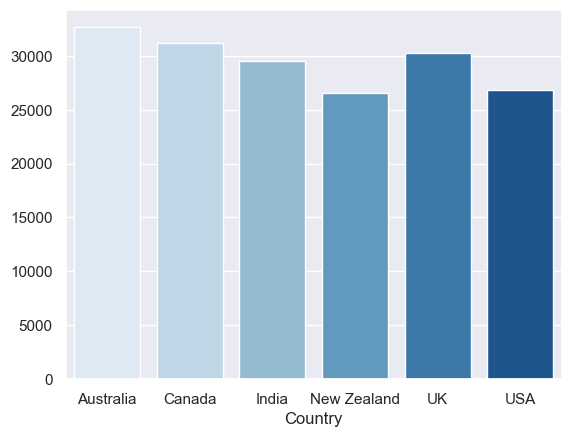

In [430]:
sns.barplot(x= da.index, y= da.values, palette= "Blues", hue= da.index, legend= False)

--------

7. **Which Product is High Selling Product Each Year?:**

In [431]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

To find the highest-selling product (by boxes shipped) each year, we'll need to:
   1. Group the data by Year and Product   
    
   2. Sum the boxes shipped for each product-year combination   
 
   3. For each year, find the product with the maximum boxes shipped    

But, in our case, the data available is only of the year 2022. So, 

In [432]:
data["year"].unique()

array([2022], dtype=int32)

In [433]:
data

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180,5320.0,Jan,2022,Tuesday,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94,7896.0,Aug,2022,Monday,3
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91,4501.0,Jul,2022,Thursday,3
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,"$12,726",342,12726.0,Apr,2022,Wednesday,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,"$13,685",184,13685.0,Feb,2022,Thursday,1
...,...,...,...,...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,"$4,410",323,4410.0,May,2022,Tuesday,2
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,"$6,559",119,6559.0,Jun,2022,Tuesday,2
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,$574,217,574.0,Jul,2022,Tuesday,3
1092,Dotty Strutley,India,Eclairs,2022-07-28,"$2,086",384,2086.0,Jul,2022,Thursday,3


In [434]:
datas= data.groupby("Product")["Boxes Shipped"].sum().sort_values(ascending= False)
datas

Product
50% Dark Bites          9792
Smooth Sliky Salty      8810
Eclairs                 8757
Caramel Stuffed Bars    8717
Spicy Special Slims     8685
Drinking Coco           8660
Milk Bars               8330
Peanut Butter Cubes     8304
After Nines             8257
White Choc              8240
Mint Chip Choco         8207
99% Dark & Pure         8127
70% Dark Bites          8015
85% Dark Bars           7793
Manuka Honey Choco      7781
Organic Choco Syrup     7749
Fruit & Nut Bars        7738
Orange Choco            7732
Raspberry Choco         7115
Baker's Choco Chips     6998
Almond Choco            6736
Choco Coated Almonds    6464
Name: Boxes Shipped, dtype: int64

So for 2022, `50% Dark Bites` is higest selling product having `9792` boxe sells.

To find top 10 best products for year 2022:

<Axes: ylabel='Product'>

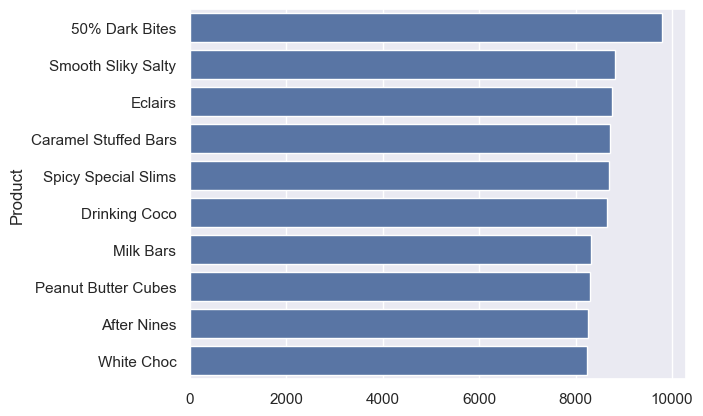

In [435]:
sns.barplot(x= datas.head(10).values, y= datas.head(10).index)

So, these are the products having higest sales in 2022.

-----

8. **Finding Monthly Sales Trend:**

In [436]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [437]:
data.head(5)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180,5320.0,Jan,2022,Tuesday,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94,7896.0,Aug,2022,Monday,3
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91,4501.0,Jul,2022,Thursday,3
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,"$12,726",342,12726.0,Apr,2022,Wednesday,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,"$13,685",184,13685.0,Feb,2022,Thursday,1


In [438]:
mst= data.groupby(by= "month")["Boxes Shipped"].sum()
mst= mst.reset_index()

In [439]:
mst

,month,Boxes Shipped
0,Apr,21003
1,Aug,19901
2,Feb,18015
3,Jan,27535
4,Jul,22876
5,Jun,26260
6,Mar,19561
7,May,21856


In [440]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [441]:
mst["month"]= pd.Categorical(mst["month"], categories=month_order, ordered=True)

In [442]:
mst.dtypes

month            category
Boxes Shipped       int64
dtype: object

In [443]:
mst.sort_values(by= "month")

,month,Boxes Shipped
3,Jan,27535
2,Feb,18015
6,Mar,19561
0,Apr,21003
7,May,21856
5,Jun,26260
4,Jul,22876
1,Aug,19901


<Axes: xlabel='month', ylabel='Boxes Shipped'>

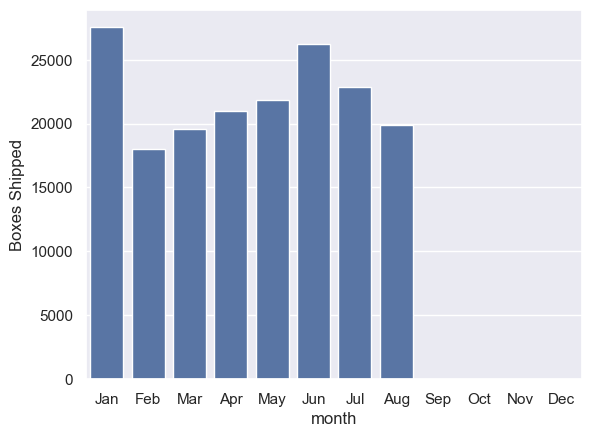

In [444]:
sns.barplot(data= mst, x= "month", y= "Boxes Shipped")

<Axes: xlabel='month', ylabel='Boxes Shipped'>

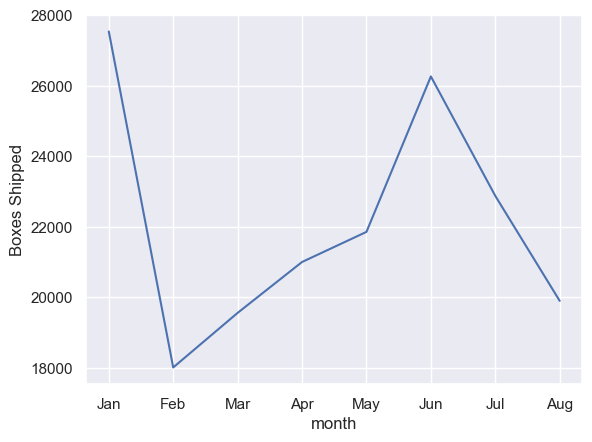

In [445]:
sns.lineplot(data= mst, y= "Boxes Shipped", x= "month")

In [446]:
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180,5320.0,Jan,2022,Tuesday,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94,7896.0,Aug,2022,Monday,3
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91,4501.0,Jul,2022,Thursday,3
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,"$12,726",342,12726.0,Apr,2022,Wednesday,2
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,"$13,685",184,13685.0,Feb,2022,Thursday,1


In [447]:
das= data.groupby(by= "month")["Amount_d"].sum().reset_index()

In [448]:
das

,month,Amount_d
0,Apr,674051.0
1,Aug,743148.0
2,Feb,699377.0
3,Jan,896105.0
4,Jul,803425.0
5,Jun,865144.0
6,Mar,749483.0
7,May,752892.0


In [449]:
das.dtypes

month        object
Amount_d    float64
dtype: object

In [450]:
# Convert months data type to categorical:
das["month"] = pd.Categorical(das["month"], categories=month_order, ordered=True)

In [451]:
das= das.sort_values(by= "month")

In [452]:
das.dtypes

month       category
Amount_d     float64
dtype: object

In [453]:
das

,month,Amount_d
3,Jan,896105.0
2,Feb,699377.0
6,Mar,749483.0
0,Apr,674051.0
7,May,752892.0
5,Jun,865144.0
4,Jul,803425.0
1,Aug,743148.0


<Axes: xlabel='month', ylabel='Amount_d'>

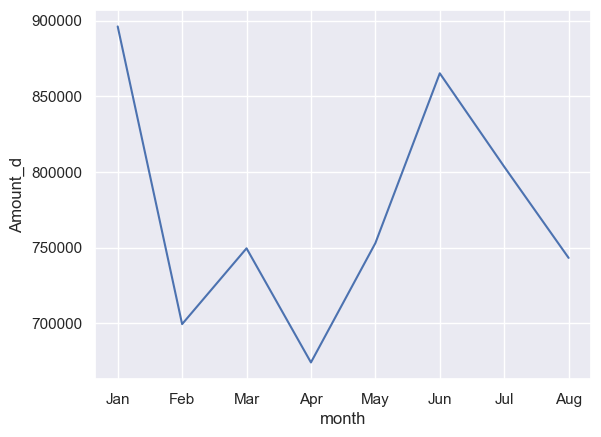

In [454]:
sns.lineplot(data= das, x= "month", y= "Amount_d")

------

9. **Show Top-Selling Products:**

In [455]:
data.head(2)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180,5320.0,Jan,2022,Tuesday,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94,7896.0,Aug,2022,Monday,3


<Axes: xlabel='Amount_d', ylabel='Product'>

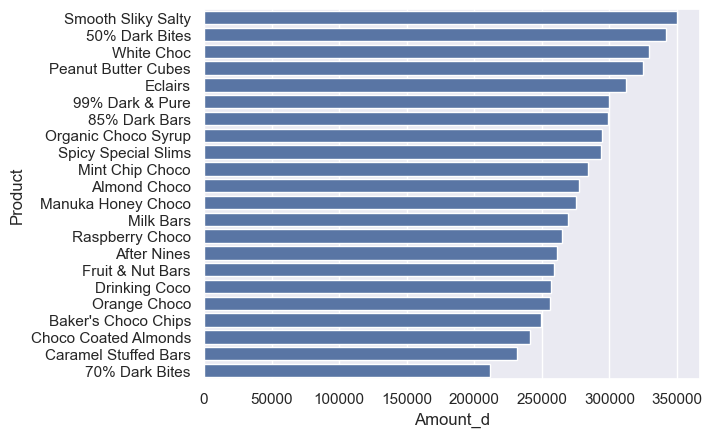

In [456]:
# Top selling products by Amount:
tsp= data.groupby(by= "Product")["Amount_d"].sum().sort_values(ascending=False).reset_index()
sns.barplot(data= tsp, y= "Product", x= "Amount_d")

<Axes: xlabel='Amount_d', ylabel='Product'>

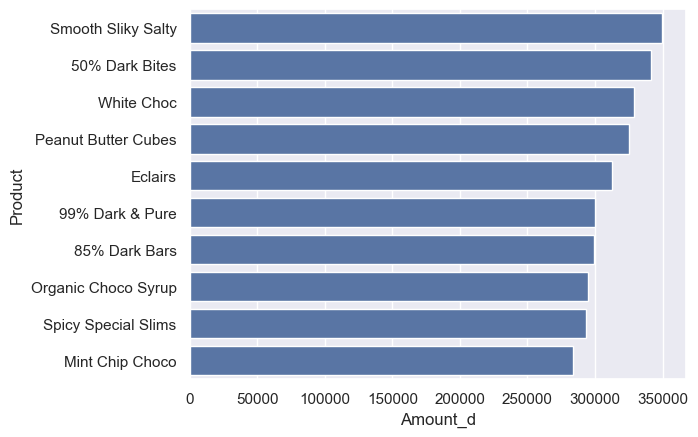

In [457]:
# 10 Top selling products by Amount:
tsp= data.groupby(by= "Product")["Amount_d"].sum().sort_values(ascending=False).reset_index()
sns.barplot(data= tsp.head(10), y= "Product", x= "Amount_d")

--------

10.  **Sales by Country**:

In [458]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [459]:
dass= data.groupby(by= "Country")["Amount_d"].sum().reset_index()

In [460]:
dass.columns

Index(['Country', 'Amount_d'], dtype='object')

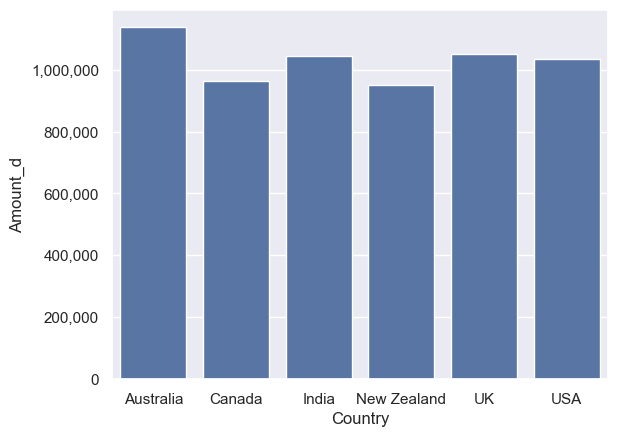

In [461]:
# Plot bar plot to show the relation:
ax = sns.barplot(data=dass, x="Country", y="Amount_d")
ax.yaxis.set_major_formatter('{x:,.0f}')  # Adds commas, no decimals
plt.show()

We can also show this in Geo-Map using libraries like: `Seaborn + Geopandas`, `Seaborn + Plotly ` or using, `Seaborn + Cartopy`.

---

11. **Sales by Sales Person:**

In [462]:
data.head(3)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,"$5,320",180,5320.0,Jan,2022,Tuesday,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,"$7,896",94,7896.0,Aug,2022,Monday,3
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,"$4,501",91,4501.0,Jul,2022,Thursday,3


In [463]:
intt= data.groupby(by= "Sales Person")["Amount_d"].sum()

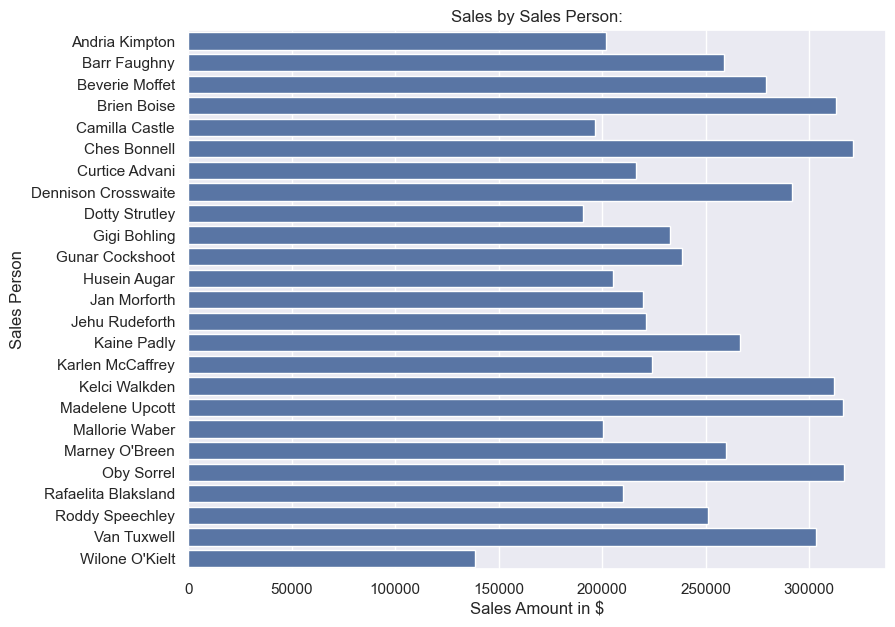

In [464]:
plt.figure(figsize=(9, 7))
sns.barplot(x= intt.values, y= intt.index)
plt.title("Sales by Sales Person:")
plt.xlabel("Sales Amount in $")
plt.ylabel("Sales Person")
plt.show()

----

12. **Monthly Boxes Shipped Trend:**

In [465]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [466]:
dfs= data.groupby(by= 'month')["Boxes Shipped"].sum().reset_index().sort_index(ascending= False)

In [467]:
dfs

,month,Boxes Shipped
7,May,21856
6,Mar,19561
5,Jun,26260
4,Jul,22876
3,Jan,27535
2,Feb,18015
1,Aug,19901
0,Apr,21003


So, monthly Box shipping data is obtained. Now, we will sort to get a general trend.

In [468]:
categories= ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [469]:
# Conver month column dtype to Cateogrical:
dfs['month'] = pd.Categorical(dfs['month'], categories= categories, ordered=True)

In [470]:
dfs

,month,Boxes Shipped
7,May,21856
6,Mar,19561
5,Jun,26260
4,Jul,22876
3,Jan,27535
2,Feb,18015
1,Aug,19901
0,Apr,21003


In [471]:
dfs= dfs.sort_values(by= "month", ascending= True)

In [472]:
dfs

,month,Boxes Shipped
3,Jan,27535
2,Feb,18015
6,Mar,19561
0,Apr,21003
7,May,21856
5,Jun,26260
4,Jul,22876
1,Aug,19901


<Axes: xlabel='month', ylabel='Boxes Shipped'>

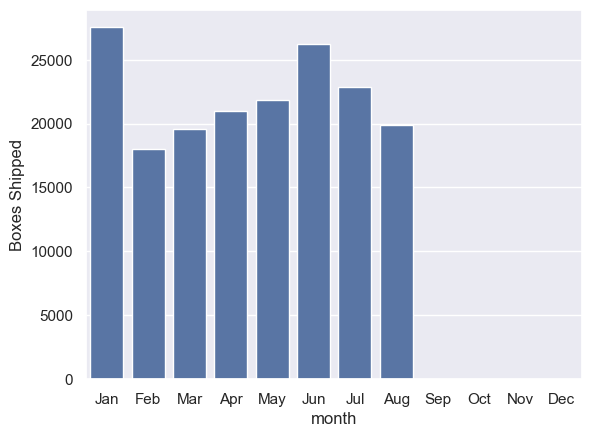

In [473]:
sns.barplot(data= dfs, x= "month", y= "Boxes Shipped")

<Axes: xlabel='month', ylabel='Boxes Shipped'>

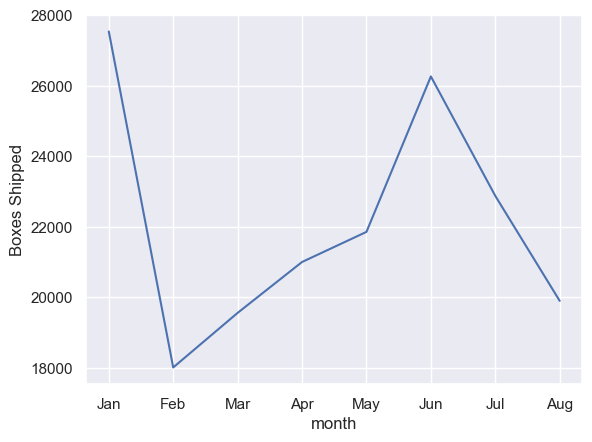

In [474]:
# What if we plot line plot:   
sns.lineplot(data= dfs, y= "Boxes Shipped", x= "month")

-----

12. **Average Order Value:**

In [475]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [476]:
data["Boxes Shipped"].mean()

np.float64(161.7979890310786)

-----

13. **Average Order Value per Country:**

In [477]:
data.groupby(by= "Country")["Boxes Shipped"].mean()

Country
Australia      159.253659
Canada         178.405714
India          160.163043
New Zealand    153.641618
UK             170.028090
USA            149.854749
Name: Boxes Shipped, dtype: float64

<Axes: xlabel='Country'>

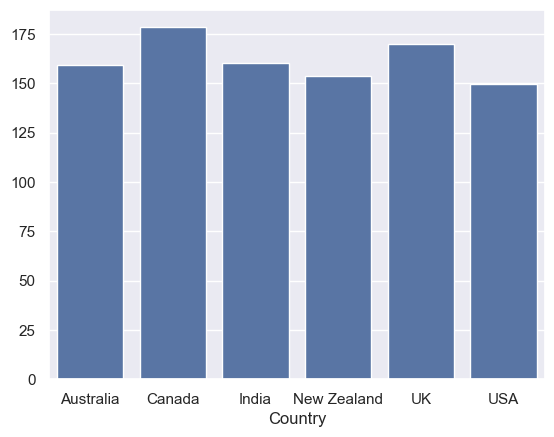

In [478]:
sns.barplot(x= data.groupby(by= "Country")["Boxes Shipped"].mean().index, y= data.groupby(by= "Country")["Boxes Shipped"].mean().values )

-----

14. **Seasonality Check:**	Extract `month` from `Date`, `group by month`.

In [479]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [480]:
data.groupby(by= "month")["Amount_d"].mean()

month
Apr    5712.296610
Aug    5545.880597
Feb    6357.972727
Jan    5818.863636
Jul    5392.114094
Jun    5307.631902
Mar    5721.244275
May    5576.977778
Name: Amount_d, dtype: float64

So, for the last three months of the year, we have no data available indicating during that period, the company may be closed.

-------

15. **Yearly Growth Rate:**	Compare year-on-year sales total.

In [481]:
data["year"].nunique()

1

As, we have only on years of data, this analysis is impossible as all the datasets are from a single year.

In [482]:
# Total sales for this single year is: 
Total_aamount= data["Amount_d"].sum()
Total_aamount

np.float64(6183625.0)

In [483]:
# Also, if we consider total boxes shipped then, 
total_boxes_shipped= data["Boxes Shipped"].sum()
total_boxes_shipped

np.int64(177007)

----

16. **Best Month Overall:**	Find the month with highest sales.

In [484]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [485]:
data.groupby(by= "month")["Amount_d"].sum().sort_values(ascending=False)

month
Jan    896105.0
Jun    865144.0
Jul    803425.0
May    752892.0
Mar    749483.0
Aug    743148.0
Feb    699377.0
Apr    674051.0
Name: Amount_d, dtype: float64

So, `January` is the month having higest sales.

-----

17. **Best Country by Product**	`Pivot table`: `rows = Country`, `cols = Product`, `values = sum(Amount)`.

In [486]:
pd.pivot_table(data= data, 
               index= "Country", 
               columns= "Product", 
               values= "Amount_d", 
               aggfunc= "sum").fillna(0)

Product,50% Dark Bites,70% Dark Bites,85% Dark Bars,99% Dark & Pure,After Nines,Almond Choco,Baker's Choco Chips,Caramel Stuffed Bars,Choco Coated Almonds,Drinking Coco,...,Manuka Honey Choco,Milk Bars,Mint Chip Choco,Orange Choco,Organic Choco Syrup,Peanut Butter Cubes,Raspberry Choco,Smooth Sliky Salty,Spicy Special Slims,White Choc
Country,,,,,,,,,,,,,,,,,,,,,
Australia,89222.0,39354.0,38479.0,54908.0,27769.0,46879.0,58303.0,39949.0,37345.0,52199.0,...,45969.0,61173.0,50701.0,59717.0,60445.0,41055.0,52829.0,45269.0,61005.0,57386.0
Canada,45115.0,59024.0,37926.0,44198.0,41993.0,42028.0,36456.0,33376.0,57463.0,47964.0,...,50589.0,41727.0,15547.0,51156.0,36631.0,62181.0,12873.0,68257.0,58051.0,46095.0
India,64547.0,34713.0,56630.0,41923.0,58758.0,50820.0,27510.0,35427.0,27958.0,45892.0,...,18760.0,24206.0,69153.0,23219.0,68075.0,76909.0,39501.0,76041.0,75495.0,32886.0
New Zealand,35294.0,37226.0,67550.0,31773.0,55699.0,29211.0,45906.0,34013.0,20888.0,31157.0,...,49889.0,36855.0,86709.0,30758.0,53074.0,31374.0,32592.0,39004.0,36127.0,57876.0
UK,50092.0,20713.0,41447.0,79100.0,34524.0,59948.0,39018.0,51233.0,56091.0,41384.0,...,42602.0,57036.0,25536.0,42252.0,25284.0,79695.0,43421.0,75628.0,37562.0,67683.0
USA,57442.0,20580.0,57197.0,47894.0,42588.0,48650.0,42420.0,37590.0,41741.0,38059.0,...,67732.0,48251.0,36323.0,49042.0,51191.0,33628.0,83524.0,45493.0,25214.0,67221.0


-----

18.  **Sales Correlation:**

Here, we are after this particular relation: Correlate between `Boxes Shipped` and `Amount`. 

In [487]:
data[["Boxes Shipped", "Amount_d"]].corr()

,Boxes Shipped,Amount_d
Boxes Shipped,1.000000,-0.018827
Amount_d,-0.018827,1.000000


<Axes: >

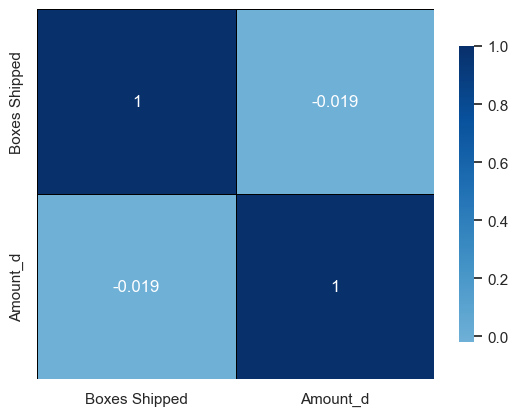

In [488]:
# Plot heatmap of correlation: 
sns.heatmap(data= data[["Boxes Shipped", "Amount_d"]].corr(), 
            annot= True, cmap= "Blues", center= 0, 
            linewidths= 0.5, linecolor= "black", 
            cbar_kws= {"shrink": 0.8})

The `correlation coefficient of -0.018827` indicates a very weak negative linear relationship between `Boxes Shipped` and `Amount_d`.

This means there is almost no meaningful linear association between the `number of boxes shipped` and the `Amount_d`. Knowing the value of one variable tells us very little about the likely value of the other in a linear sense. The relationship is negligible.

In general, if the number of boxes shipped increases, the Amount should also increase too. But our dataset is not speaking this as the `Amount` is decreasing slightly.

-----

19. **Sales Forecasting** Use `ARIMA` or `Prophet` on monthly data.

In [489]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [490]:
data.dtypes

Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                   object
Boxes Shipped             int64
Amount_d                float64
month                    object
year                      int32
day_of_week              object
quarter                  object
dtype: object

**ARIMA (Statsmodels):**  
`ARIMA` (`AutoRegressive Integrated Moving Average`) is good for stationary time series.

c:\Users\MyMachine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MyMachine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MyMachine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MyMachine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-st

Next 6 Months Forecast:
1094    4043.215124
1095    5819.538665
1096    5694.141949
1097    5562.883713
1098    4621.134168
1099    5818.928720
Name: predicted_mean, dtype: float64


c:\Users\MyMachine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\MyMachine\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\MyMachine\AppData\Local\Temp\ipykernel_3960\3316031677.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=7, freq='M')[1:], forecast, label='Forecast', color='red')  # Align dates


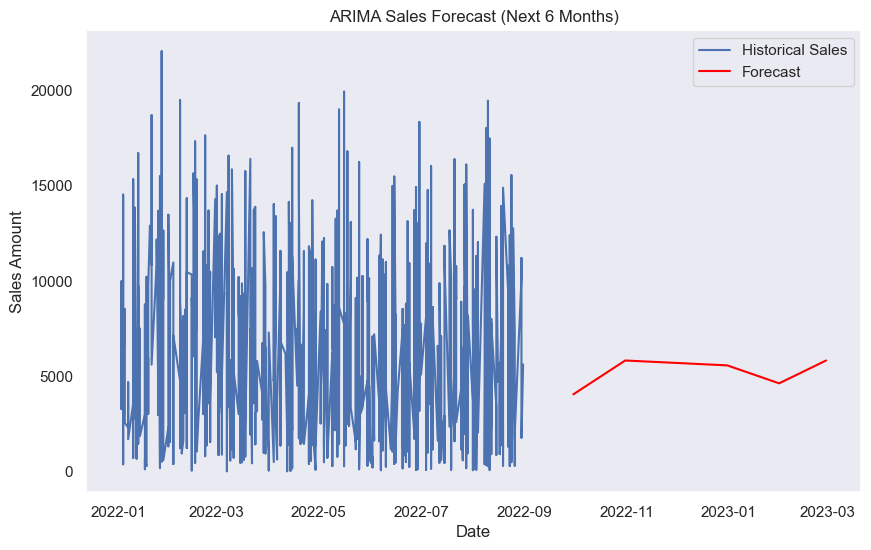

In [491]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
# Convert 'Date' to datetime and set as index (critical for ARIMA)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Ensure data is sorted by date
data = data.sort_index()

# Fit ARIMA model (order = (p, d, q))
# Start with (1, 1, 1) for non-seasonal data, but adjust based on diagnostics
model = ARIMA(data['Amount_d'], order=(11, 2, 9))
results = model.fit()

# Forecast next 6 months (steps=6)
forecast = results.forecast(steps=6)
print("Next 6 Months Forecast:")
print(forecast)

# Optional: Plot historical vs. forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Amount_d'], label='Historical Sales')
plt.plot(pd.date_range(data.index[-1], periods=7, freq='M')[1:], forecast, label='Forecast', color='red')  # Align dates
plt.title('ARIMA Sales Forecast (Next 6 Months)')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid()
plt.show()

-----

20. **Product Diversity by Country:**	`Count` of unique products sold in each country.

In [492]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [493]:
con= data.groupby(by= "Country")["Product"].value_counts()
con

Country    Product             
Australia  50% Dark Bites          16
           Drinking Coco           12
           Organic Choco Syrup     12
           99% Dark & Pure         11
           Almond Choco            11
                                   ..
USA        Caramel Stuffed Bars     6
           Organic Choco Syrup      6
           Baker's Choco Chips      5
           Choco Coated Almonds     4
           Mint Chip Choco          4
Name: count, Length: 132, dtype: int64

In [494]:
con["Australia"]

Product
50% Dark Bites          16
Drinking Coco           12
Organic Choco Syrup     12
99% Dark & Pure         11
Almond Choco            11
Milk Bars               11
Raspberry Choco         11
White Choc              11
Eclairs                 10
70% Dark Bites           9
Baker's Choco Chips      9
Fruit & Nut Bars         9
85% Dark Bars            8
Manuka Honey Choco       8
Orange Choco             8
Smooth Sliky Salty       8
Spicy Special Slims      8
After Nines              7
Caramel Stuffed Bars     7
Mint Chip Choco          7
Choco Coated Almonds     6
Peanut Butter Cubes      6
Name: count, dtype: int64

In [495]:
con["UK"]

Product
50% Dark Bites          12
Drinking Coco           12
White Choc              12
99% Dark & Pure         11
Smooth Sliky Salty      11
Baker's Choco Chips      9
Caramel Stuffed Bars     9
Choco Coated Almonds     9
Milk Bars                9
Peanut Butter Cubes      9
Almond Choco             8
Eclairs                  8
Manuka Honey Choco       8
70% Dark Bites           6
85% Dark Bars            6
Mint Chip Choco          6
Orange Choco             6
Organic Choco Syrup      6
Raspberry Choco          6
After Nines              5
Fruit & Nut Bars         5
Spicy Special Slims      5
Name: count, dtype: int64

And, so on.

----

21. **Top Performer (Sales Person):**	Who sold the most and in which country/product.

In [496]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [497]:
data["Sales Person"].value_counts().head()

Sales Person
Kelci Walkden          54
Brien Boise            53
Van Tuxwell            51
Beverie Moffet         50
Dennison Crosswaite    49
Name: count, dtype: int64

So, overall, `Kelci Walkden` with `54` sales is the best perfor Sales Person.

In [498]:
a= data.groupby(by= "Country")["Sales Person"].value_counts()

In [499]:
a["UK"].idxmax()

'Jehu Rudeforth'

In [500]:
a["India"].idxmax()

'Jan Morforth'

In [501]:
a["Australia"].idxmax()

'Brien Boise'

And, so on.

-----

22. **Compare Box vs. Revenue:** **Box plot or scatter:** Here I show the relation between Shipping and Amount using plot between `Boxes Shipped` vs. `Amount_d`.

In [502]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [503]:
data.head(2)

,Sales Person,Country,Product,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
Date,,,,,,,,,,
2022-01-03,Marney O'Breen,Australia,Smooth Sliky Salty,"$3,745",170,3745.0,Jan,2022,Monday,1
2022-01-03,Andria Kimpton,Canada,Caramel Stuffed Bars,"$7,154",348,7154.0,Jan,2022,Monday,1


<Axes: xlabel='Boxes Shipped', ylabel='Amount_d'>

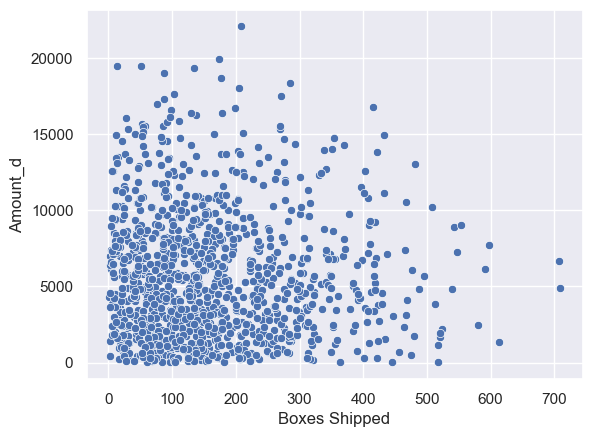

In [504]:
sns.scatterplot(data= data, x= "Boxes Shipped", y= "Amount_d") 

Here, the dataset is somehow contradectory to the general convension. This is because, as the number of shipped datasets increases, the amount should increase but this phenomenon is strong as sheen from the scatter plot. For small number of shipped boxes, amounts are reasonable but for large amounts, this is somehow questionable. There may be other factors affecting the price but without further investigation it is unclear here.

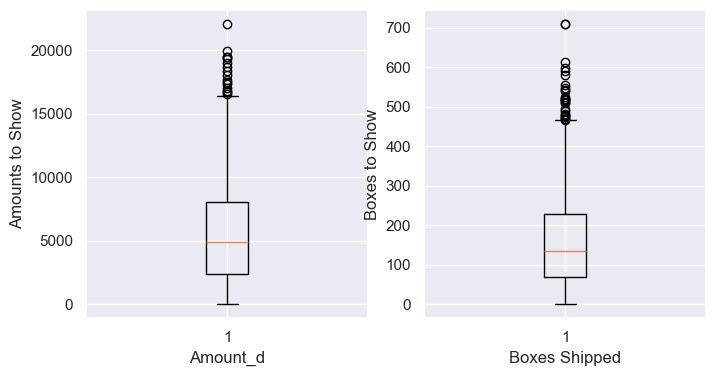

In [505]:
fig, ax1= plt.subplots(1, 2, figsize=(8, 4))

# Box plot of Amount_d: 
ax1[0].boxplot(data["Amount_d"])
ax1[1].boxplot(data["Boxes Shipped"])
ax1[0].set_xlabel("Amount_d")
ax1[0].set_ylabel("Amounts to Show")
ax1[1].set_xlabel("Boxes Shipped")
ax1[1].set_ylabel("Boxes to Show")
plt.show()

The box plots shows large number of potential outliers.

-----

23. **Return on Effort (Boxes):**	Revenue per box (Amount / Boxes Shipped).

In [506]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

To calculate the return on Effort ie. return on box shipped:

In [507]:
total_sales_amount= data["Amount_d"].sum()
total_boxes_shipped= data["Boxes Shipped"].sum()
return_Per_box= total_sales_amount/ total_boxes_shipped
return_Per_box.round()

np.float64(35.0)

So, on average the return per shipping is `35.0`.

To calculate return per country:

In [508]:
def ret_cont(group):  # Takes a group (subset for each country) as input
    total_sales_amount = group["Amount_d"].sum()
    total_boxes_shipped = group["Boxes Shipped"].sum()  # Fixed the column name here
    return total_sales_amount / total_boxes_shipped

# Apply the function correctly
result = data.groupby(by="Country").apply(ret_cont)
print(result)

Country
Australia      34.838331
Canada         30.841389
India          35.486936
New Zealand    35.756885
UK             34.752751
USA            38.597860
dtype: float64


C:\Users\MyMachine\AppData\Local\Temp\ipykernel_3960\2317624755.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = data.groupby(by="Country").apply(ret_cont)


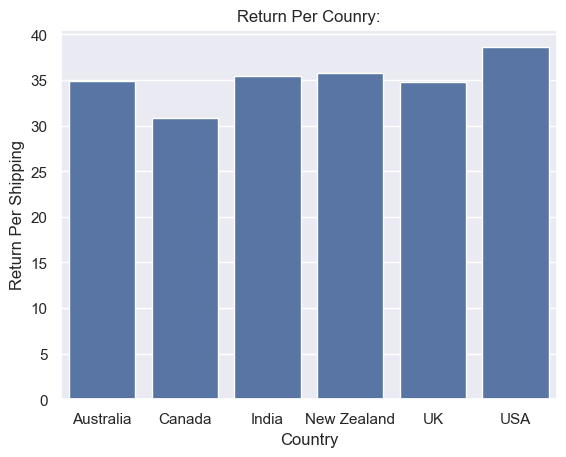

In [509]:
sns.barplot(y= result.values, x= result.index)
plt.title("Return Per Counry:")
plt.xlabel("Country")
plt.ylabel("Return Per Shipping")
plt.show()

-----

24. **Monthly Country-Wise Growth:**	Sales trend over time for each country.

In [510]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [511]:
das= data.groupby(by= ["Country", "month"])["Amount_d"].sum().reset_index()
das.head()

,Country,month,Amount_d
0,Australia,Apr,120561.0
1,Australia,Aug,136521.0
2,Australia,Feb,126406.0
3,Australia,Jan,187383.0
4,Australia,Jul,131082.0


In [512]:
das["month"]= pd.Categorical(das["month"], categories= ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], ordered=True)
Australia= das[das["Country"]== "Australia"]

In [513]:
Australia

,Country,month,Amount_d
0,Australia,Apr,120561.0
1,Australia,Aug,136521.0
2,Australia,Feb,126406.0
3,Australia,Jan,187383.0
4,Australia,Jul,131082.0
5,Australia,Jun,145719.0
6,Australia,Mar,165431.0
7,Australia,May,124264.0


In [514]:
Australia.dtypes

Country       object
month       category
Amount_d     float64
dtype: object

In [515]:
Australia.sort_values(by= "month", ascending=True)

,Country,month,Amount_d
3,Australia,Jan,187383.0
2,Australia,Feb,126406.0
6,Australia,Mar,165431.0
0,Australia,Apr,120561.0
7,Australia,May,124264.0
5,Australia,Jun,145719.0
4,Australia,Jul,131082.0
1,Australia,Aug,136521.0


<Axes: xlabel='month', ylabel='Amount_d'>

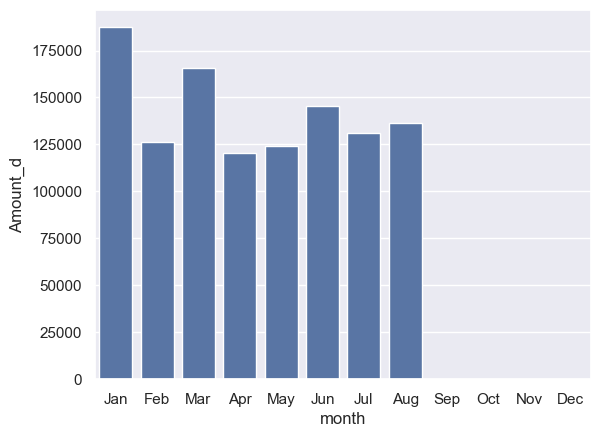

In [516]:
sns.barplot(data= Australia, x= "month", y= "Amount_d")

C:\Users\MyMachine\AppData\Local\Temp\ipykernel_3960\2146547654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india.sort_values(by= "month", ascending=True, inplace= True)


<Axes: xlabel='month', ylabel='Amount_d'>

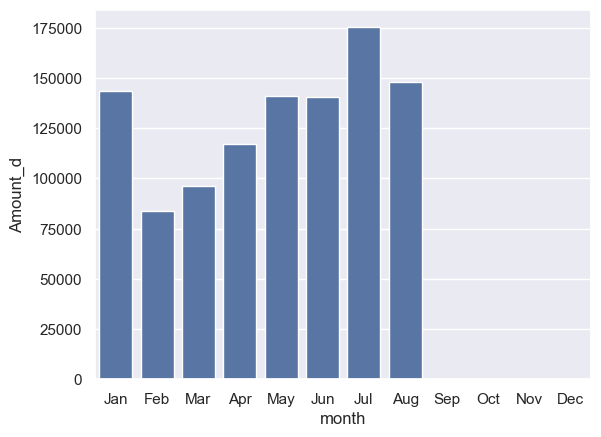

In [517]:
india= das[das["Country"]== "India"]
india.sort_values(by= "month", ascending=True, inplace= True)
sns.barplot(data= india, x= "month", y= "Amount_d")

----

25.  **Product Launch Success:**   
Here, I try to analyze which product is successful worldwide based on the available 8 months of data.

In [518]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [519]:
data.groupby(by= "Product")["Amount_d"].sum().sort_values(ascending=False)

Product
Smooth Sliky Salty      349692.0
50% Dark Bites          341712.0
White Choc              329147.0
Peanut Butter Cubes     324842.0
Eclairs                 312445.0
99% Dark & Pure         299796.0
85% Dark Bars           299229.0
Organic Choco Syrup     294700.0
Spicy Special Slims     293454.0
Mint Chip Choco         283969.0
Almond Choco            277536.0
Manuka Honey Choco      275541.0
Milk Bars               269248.0
Raspberry Choco         264740.0
After Nines             261331.0
Fruit & Nut Bars        259147.0
Drinking Coco           256655.0
Orange Choco            256144.0
Baker's Choco Chips     249613.0
Choco Coated Almonds    241486.0
Caramel Stuffed Bars    231588.0
70% Dark Bites          211610.0
Name: Amount_d, dtype: float64

<Axes: ylabel='Product'>

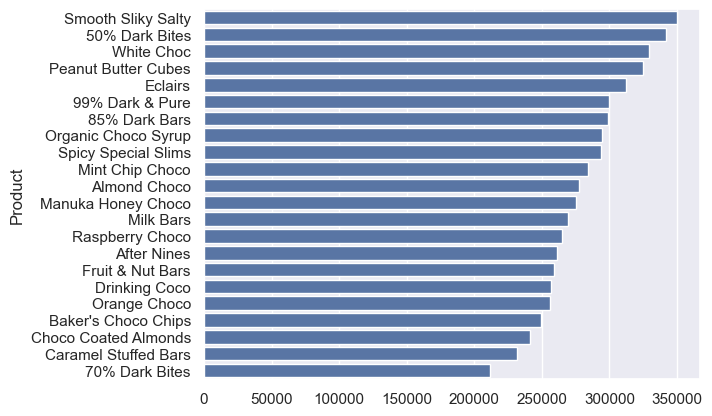

In [520]:
sns.barplot(x= data.groupby(by= "Product")["Amount_d"].sum().sort_values(ascending=False).values, y= data.groupby(by= "Product")["Amount_d"].sum().sort_values(ascending=False).index)

In [521]:
data.groupby(by= "Product")["Boxes Shipped"].sum().sort_values(ascending=False)

Product
50% Dark Bites          9792
Smooth Sliky Salty      8810
Eclairs                 8757
Caramel Stuffed Bars    8717
Spicy Special Slims     8685
Drinking Coco           8660
Milk Bars               8330
Peanut Butter Cubes     8304
After Nines             8257
White Choc              8240
Mint Chip Choco         8207
99% Dark & Pure         8127
70% Dark Bites          8015
85% Dark Bars           7793
Manuka Honey Choco      7781
Organic Choco Syrup     7749
Fruit & Nut Bars        7738
Orange Choco            7732
Raspberry Choco         7115
Baker's Choco Chips     6998
Almond Choco            6736
Choco Coated Almonds    6464
Name: Boxes Shipped, dtype: int64

<Axes: ylabel='Product'>

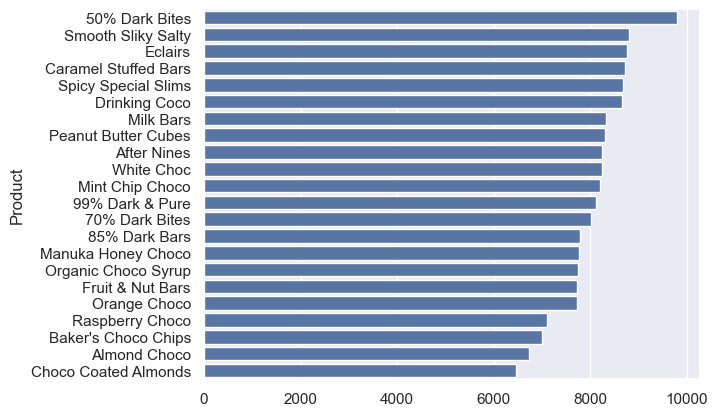

In [522]:
sns.barplot(x= data.groupby(by= "Product")["Boxes Shipped"].sum().sort_values(ascending=False).values, y= data.groupby(by= "Product")["Boxes Shipped"].sum().sort_values(ascending=False).index)

----

26. **Weekend vs Weekday Sales:**

In [523]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [524]:
data.groupby(by= "day_of_week")["Amount_d"].sum()

day_of_week
Friday       1061774.0
Monday       1385783.0
Thursday     1244789.0
Tuesday      1286719.0
Wednesday    1204560.0
Name: Amount_d, dtype: float64

<Axes: xlabel='day_of_week'>

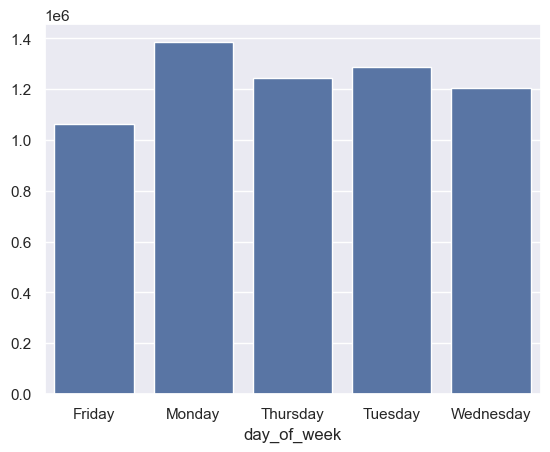

In [525]:
sns.barplot(x= data.groupby(by= "day_of_week")["Amount_d"].sum().index, y= data.groupby(by= "day_of_week")["Amount_d"].sum().values)

No sells data available for weekends. `Monday` is the best performing weekend.

--------

27. **Sales Distribution per Salesperson:**

In [526]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

C:\Users\MyMachine\AppData\Local\Temp\ipykernel_3960\1943196025.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data.groupby(by= "Sales Person").apply(lambda x: x["Amount_d"].plot(kind= "kde"))


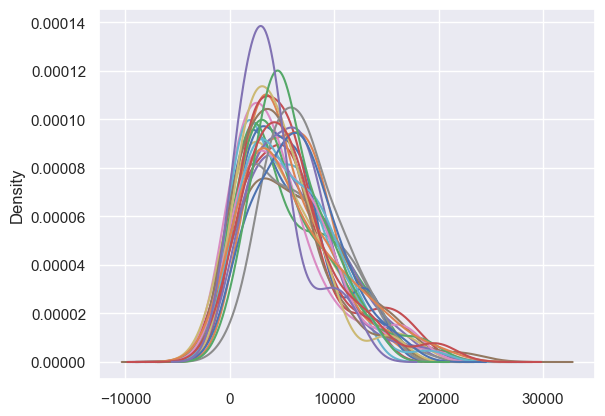

In [527]:
data.groupby(by= "Sales Person").apply(lambda x: x["Amount_d"].plot(kind= "kde"))
plt.show()

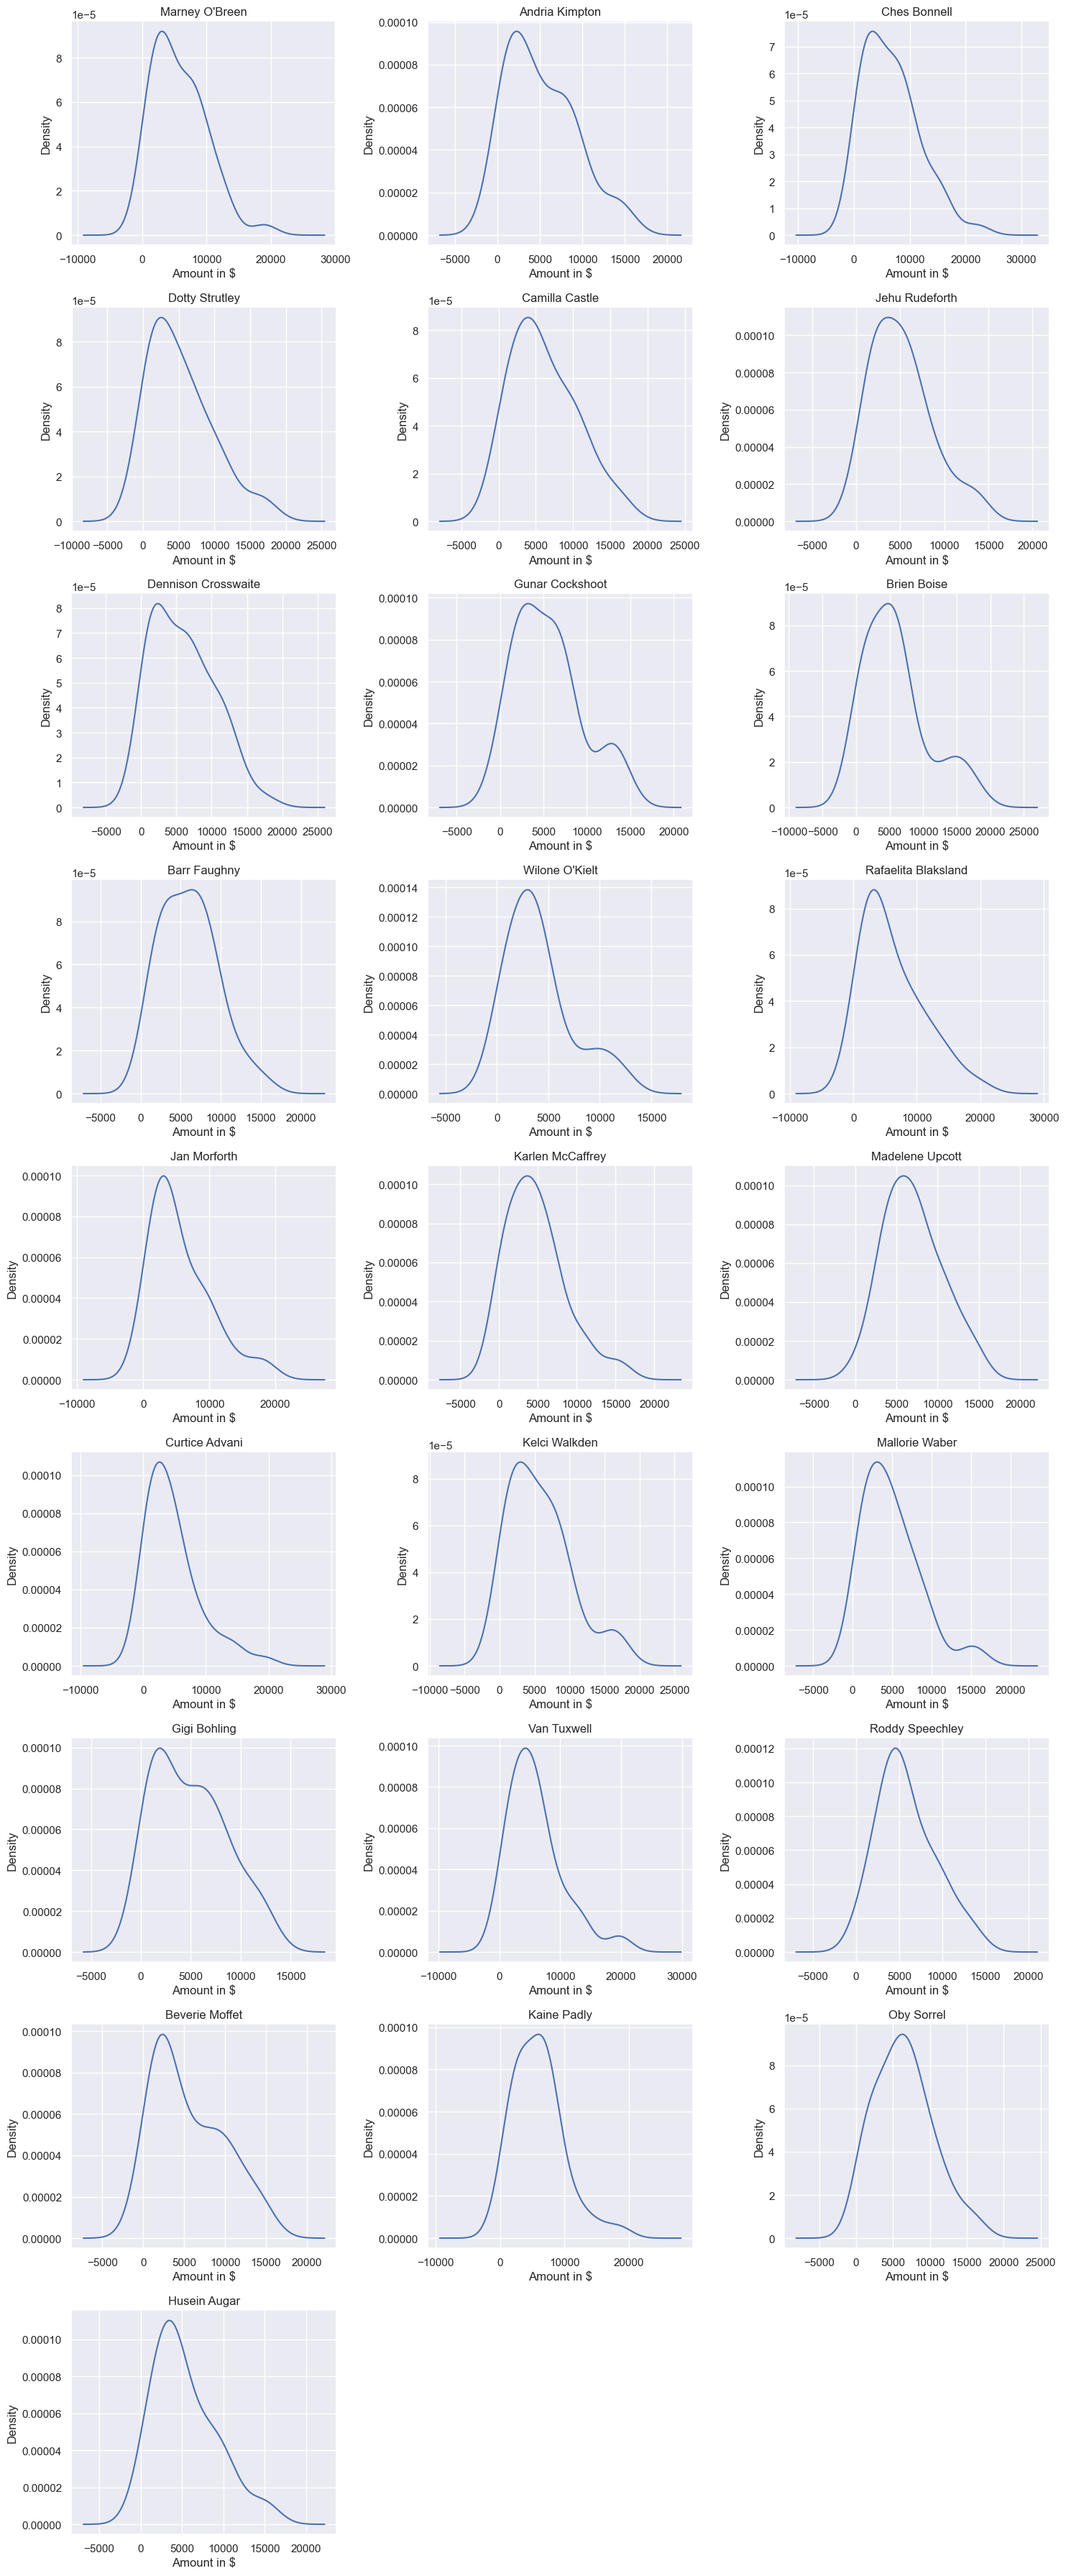

In [528]:
# Get unique sales persons
sales_persons = data["Sales Person"].unique()
n_sales = len(sales_persons)
n_cols = 3  # You can adjust the number of columns as needed
n_rows = (n_sales + n_cols - 1) // n_cols  # Calculate rows required

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

# Plot the KDE for each sales person on its subplot
for ax, person in zip(axes, sales_persons):
    subset = data[data["Sales Person"] == person]
    subset["Amount_d"].plot(kind="kde", ax=ax)
    ax.set_title(person)
    ax.set_xlabel("Amount in $")
    ax.set_ylabel("Density")

# Remove any extra empty subplots if they exist
for ax in axes[len(sales_persons):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

-----

28. **Seasonal Peaks:**	Identify months/quarters with peak sales.

In [529]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [530]:
data.dtypes

Sales Person      object
Country           object
Product           object
Amount            object
Boxes Shipped      int64
Amount_d         float64
month             object
year               int32
day_of_week       object
quarter           object
dtype: object

In [531]:
moon= data.groupby(by= "month")["Amount_d"].sum().sort_index()
moon

month
Apr    674051.0
Aug    743148.0
Feb    699377.0
Jan    896105.0
Jul    803425.0
Jun    865144.0
Mar    749483.0
May    752892.0
Name: Amount_d, dtype: float64

<Axes: xlabel='month'>

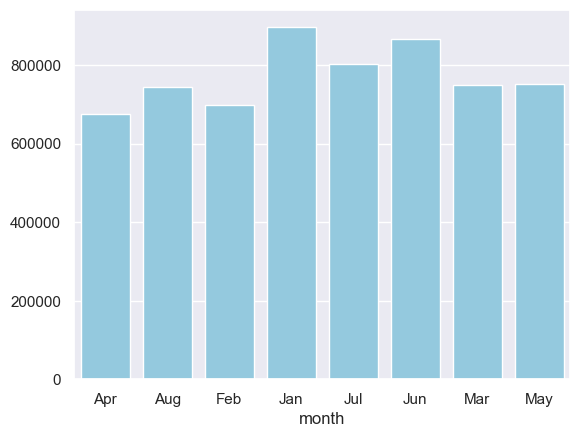

In [532]:
sns.barplot(x= moon.index, y= moon.values, color='skyblue')

In [533]:
data.groupby(by= "quarter")["Amount_d"].sum()

quarter
1    2344965.0
2    2292087.0
3    1546573.0
Name: Amount_d, dtype: float64

<Axes: xlabel='quarter'>

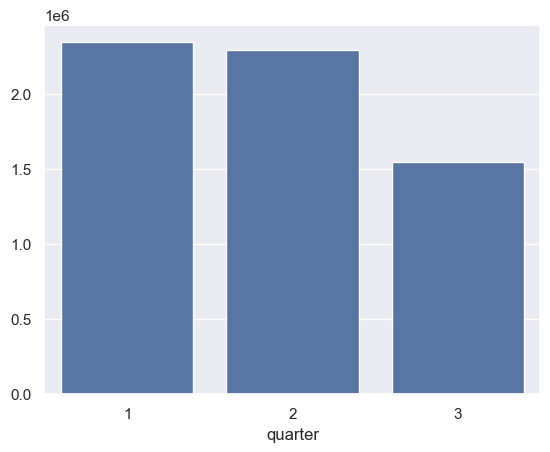

In [534]:
sns.barplot(x= data.groupby(by= "quarter")["Amount_d"].sum().index, y= data.groupby(by= "quarter")["Amount_d"].sum().values)

-----

29. **Sales Volatility:**	Standard deviation of monthly sales.

In [535]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [536]:
data.head(4)

,Sales Person,Country,Product,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
Date,,,,,,,,,,
2022-01-03,Marney O'Breen,Australia,Smooth Sliky Salty,"$3,745",170,3745.0,Jan,2022,Monday,1
2022-01-03,Andria Kimpton,Canada,Caramel Stuffed Bars,"$7,154",348,7154.0,Jan,2022,Monday,1
2022-01-03,Marney O'Breen,Canada,Spicy Special Slims,"$3,528",336,3528.0,Jan,2022,Monday,1
2022-01-03,Ches Bonnell,UK,White Choc,"$3,269",226,3269.0,Jan,2022,Monday,1


In [537]:
std = data.groupby(by= "month")["Amount_d"].std().reset_index()
std

,month,Amount_d
0,Apr,4427.581988
1,Aug,4333.895551
2,Feb,4304.942215
3,Jan,4094.606090
4,Jul,3819.581676
5,Jun,3896.375693
6,Mar,4062.275965
7,May,4017.279501


The table displays the `standard deviation` of the sales amounts for each month. Standard deviation shows how spread out the amounts are from the average value for that month. For example:

`April`: ~4427.58 indicates that sales amounts in April typically vary by about $4427.58 from the mean.

`August`: ~$4333.90 shows a slightly lower variability than April.

`February`: ~$4304.94

`January`: ~$4094.61

`July`: ~$3819.58, which is on the lower end, suggesting less fluctuation.

`June`: ~$3896.38

`March`: ~$4062.28

`May`: ~$4017.28

Overall, the values suggest that certain months (like `April` and `August`) have higher variability in sales, while months such as `July` show relatively more consistent sales amounts.



In [538]:
std["month"]= pd.Categorical(std["month"], categories= ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], ordered=True)

In [539]:
std.dtypes

month       category
Amount_d     float64
dtype: object

<Axes: xlabel='month', ylabel='Amount_d'>

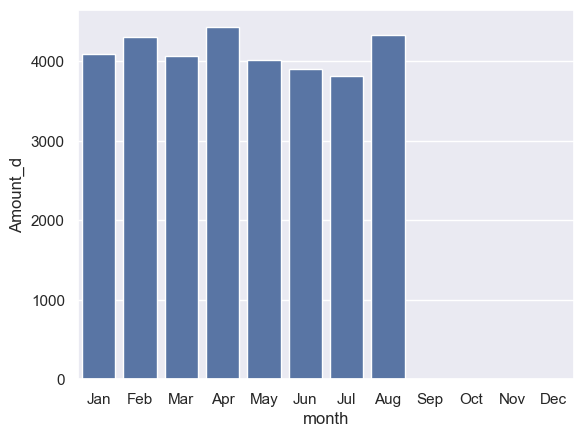

In [540]:
sns.barplot(data= std, x= "month", y= "Amount_d")

-----

30. **Outlier Transactions:**	Very high/low Amount values.

In [541]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [542]:
data["Amount_d"].describe()

count     1094.000000
mean      5652.308044
std       4102.442014
min          7.000000
25%       2390.500000
50%       4868.500000
75%       8027.250000
max      22050.000000
Name: Amount_d, dtype: float64

In [543]:
data[data["Amount_d"]>=15000].sort_values(by= "Amount_d", ascending=False)

,Sales Person,Country,Product,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
Date,,,,,,,,,,
2022-01-27,Ches Bonnell,India,Peanut Butter Cubes,"$22,050",208,22050.0,Jan,2022,Thursday,1
2022-05-16,Van Tuxwell,India,Organic Choco Syrup,"$19,929",174,19929.0,May,2022,Monday,2
2022-02-07,Rafaelita Blaksland,New Zealand,Eclairs,"$19,481",51,19481.0,Feb,2022,Monday,1
2022-08-10,Van Tuxwell,Australia,Organic Choco Syrup,"$19,453",14,19453.0,Aug,2022,Wednesday,3
2022-04-19,Curtice Advani,India,Smooth Sliky Salty,"$19,327",135,19327.0,Apr,2022,Tuesday,2
2022-05-13,Marney O'Breen,UK,Smooth Sliky Salty,"$18,991",88,18991.0,May,2022,Friday,2
2022-01-21,Kaine Padly,UK,After Nines,"$18,697",176,18697.0,Jan,2022,Friday,1
2022-06-30,Jan Morforth,New Zealand,Mint Chip Choco,"$18,340",285,18340.0,Jun,2022,Thursday,2
2022-08-09,Brien Boise,India,85% Dark Bars,"$18,032",205,18032.0,Aug,2022,Tuesday,3


In [544]:
data[data["Amount_d"]< 25]

,Sales Person,Country,Product,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
Date,,,,,,,,,,
2022-03-07,Gunar Cockshoot,UK,99% Dark & Pure,$7,84,7.0,Mar,2022,Monday,1
2022-04-12,Kaine Padly,New Zealand,Smooth Sliky Salty,$7,518,7.0,Apr,2022,Tuesday,2


So, these two sales can be the potential Outliers and among them "Smooth Sliky Salty" having amount $7 and number of boxes shipped 518 is even more suspecious.

Outliers Detection using Box plots:

Text(0, 0.5, 'Boxes Shipped')

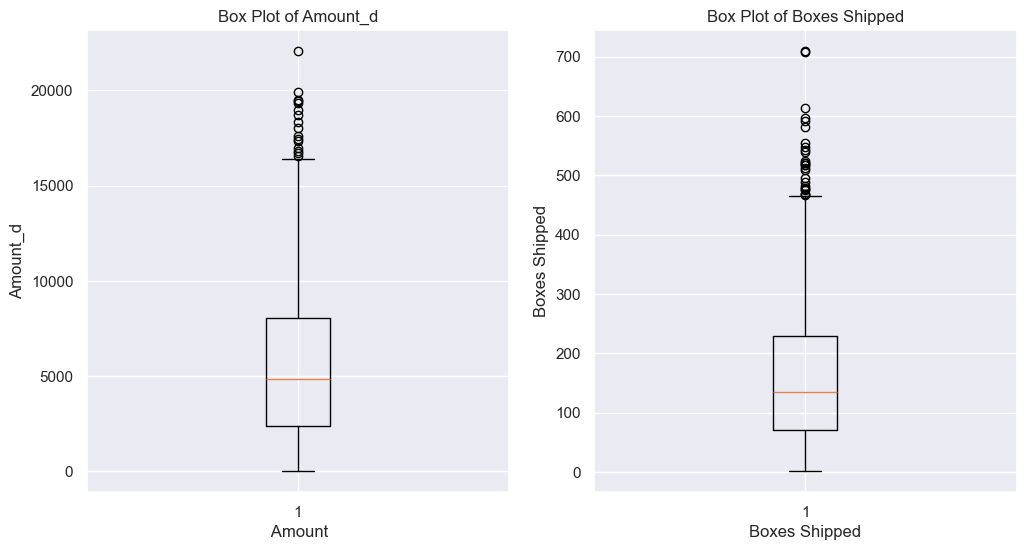

In [545]:
# Using sns set theme for better looking:
sns.set_theme()
# Outliers detecting using box plots:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(data["Amount_d"])
ax[0].set_title("Box Plot of Amount_d")
# Set x and y labels 
ax[0].set_xlabel(" Amount")
ax[0].set_ylabel("Amount_d")

ax[1].boxplot(data["Boxes Shipped"])
ax[1].set_title("Box Plot of Boxes Shipped")
# Set x and y labels
ax[1].set_xlabel("Boxes Shipped")
ax[1].set_ylabel("Boxes Shipped")

A **box plot** (or box-and-whisker plot) summarizes the distribution of a numerical variable using five key metrics:  

```
Lower Whisker (Min)                       Upper Whisker (Max)                 
                                                                              
             ┌────────────┬──────────┐                                        
 ...    |    │            │          │                      |             ....
             └────────────┴──────────┘                                        
            Q1          Median       Q3                                       
```

1. **Minimum (Lower Whisker)** – The smallest non-outlier value (`Q1 - 1.5 * IQR`).  
2. **First Quartile (Q1, 25th percentile)** – The median of the lower half of the data.  
3. **Median (Q2, 50th percentile)** – The middle value of the dataset.  
4. **Third Quartile (Q3, 75th percentile)** – The median of the upper half of the data.  
5. **Maximum (Upper Whisker)** – The largest non-outlier value (`Q3 + 1.5 * IQR`).  

✔ **Box Length (IQR)** = `Q3 - Q1` → Shows spread of the middle 50% of data.  
✔ **Whiskers** → Indicate variability outside the IQR (non-outlier range).  
✔ **Outliers** → Points beyond the whiskers (extreme values).  
✔ **Symmetry** → If the median is centered, the distribution is symmetric; if skewed, one tail is longer.  




> ![](https://th.bing.com/th/id/OIP.CGTdQjHRVkDaadYI5iYHZQHaCx?rs=1&pid=ImgDetMain)

----

31. **Revenue Contribution (%):**	Each country/product’s % contribution.

In [546]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [547]:
total_revenue= data["Amount_d"].sum()
total_revenue

# Find the Revanue contribution by each country:
dict= data.groupby(by= 'Country')['Amount_d'].sum().to_dict()
for key, value in dict.items():
    print(f"{key}, Contributes to: {round(value/total_revenue*100)}% to the total Revanue.")

Australia, Contributes to: 18% to the total Revanue.
Canada, Contributes to: 16% to the total Revanue.
India, Contributes to: 17% to the total Revanue.
New Zealand, Contributes to: 15% to the total Revanue.
UK, Contributes to: 17% to the total Revanue.
USA, Contributes to: 17% to the total Revanue.


In [548]:
# To find the revanue Contribution by each product:
dict= data.groupby(by="Product" )["Amount_d"].sum().to_dict()
dict
for key, value in dict.items():
    print(F"{key}, Contributes to {round(value/total_revenue*100)}% to the Total Revanue.")

50% Dark Bites, Contributes to 6% to the Total Revanue.
70% Dark Bites, Contributes to 3% to the Total Revanue.
85% Dark Bars, Contributes to 5% to the Total Revanue.
99% Dark & Pure, Contributes to 5% to the Total Revanue.
After Nines, Contributes to 4% to the Total Revanue.
Almond Choco, Contributes to 4% to the Total Revanue.
Baker's Choco Chips, Contributes to 4% to the Total Revanue.
Caramel Stuffed Bars, Contributes to 4% to the Total Revanue.
Choco Coated Almonds, Contributes to 4% to the Total Revanue.
Drinking Coco, Contributes to 4% to the Total Revanue.
Eclairs, Contributes to 5% to the Total Revanue.
Fruit & Nut Bars, Contributes to 4% to the Total Revanue.
Manuka Honey Choco, Contributes to 4% to the Total Revanue.
Milk Bars, Contributes to 4% to the Total Revanue.
Mint Chip Choco, Contributes to 5% to the Total Revanue.
Orange Choco, Contributes to 4% to the Total Revanue.
Organic Choco Syrup, Contributes to 5% to the Total Revanue.
Peanut Butter Cubes, Contributes to 5% 

----

32. **Low Revenue High Volume:**	High boxes, low amount — possible inefficiencies.

In [549]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

<Axes: xlabel='Boxes Shipped', ylabel='Amount_d'>

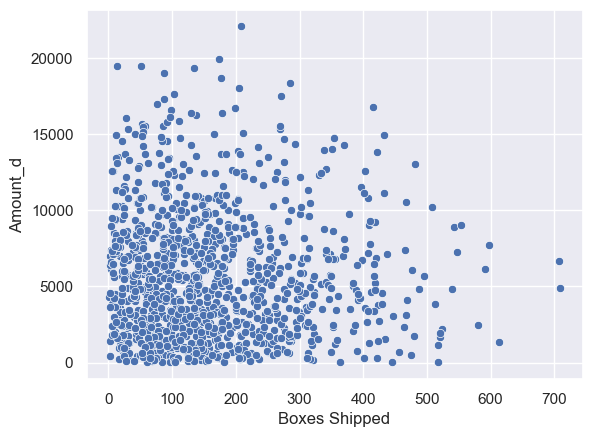

In [550]:
sns.scatterplot(data= data, y= "Amount_d", x= "Boxes Shipped")

-----

33.  **Shipping Heatmap by Country & Month:**

<Axes: xlabel='Country-month'>

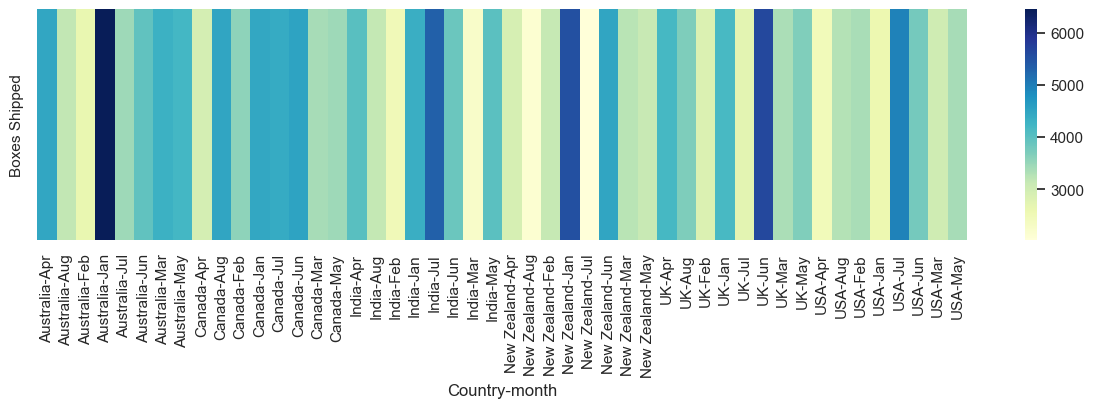

In [551]:
plt.figure(figsize= (15, 3))
sns.heatmap(pd.pivot_table(data= data,values="Boxes Shipped", columns= ["Country", "month"], aggfunc="sum"), cmap="YlGnBu")

34. **Sales Heatmap by Country and Month:**

<Axes: xlabel='Country-month'>

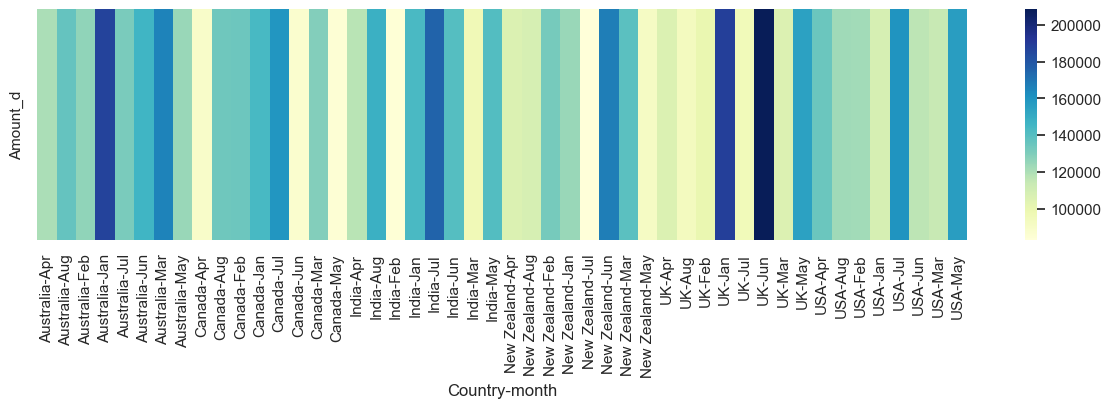

In [552]:
plt.figure(figsize= (15, 3))
sns.heatmap(pd.pivot_table(data= data,values="Amount_d", columns= ["Country", "month"], aggfunc="sum"), cmap="YlGnBu")

------

35. **Top 10 Sales Days:**	Sort by Amount, take top 10 dates.

In [553]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

-----

36. **Moving Averages:**	Rolling average on monthly sales for trend smoothing.

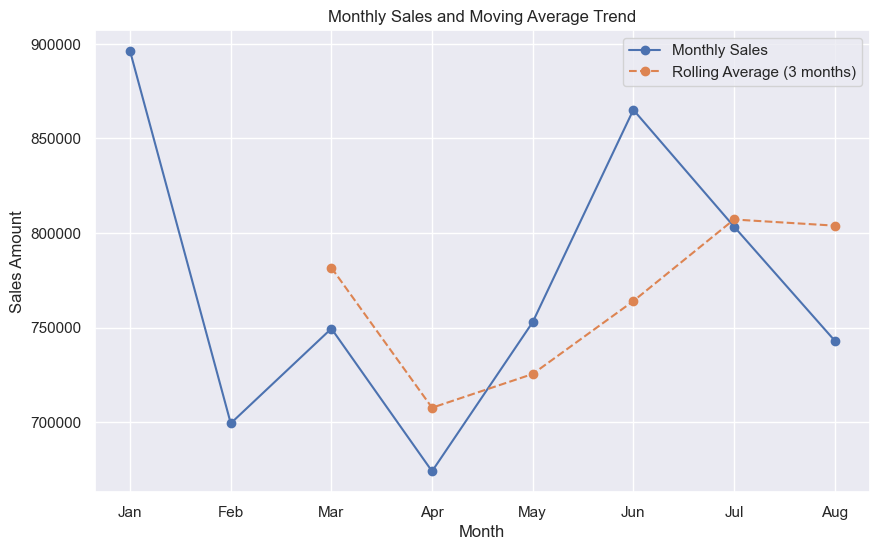

In [554]:
# Group the data by month and sum the sales
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales = data.groupby("month")["Amount_d"].sum().reindex(month_order)

# Calculate the rolling average with a window size of 3 months (adjust window as needed)
rolling_average = monthly_sales.rolling(window=3).mean()

# Plot the monthly sales and the rolling average trend
plt.figure(figsize=(10,6))
plt.plot(month_order, monthly_sales, marker='o', label='Monthly Sales')
plt.plot(month_order, rolling_average, marker='o', label='Rolling Average (3 months)', linestyle='--')
plt.title('Monthly Sales and Moving Average Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.show()

----
----
-----
----
----
----
----
----
----
----
-----
---

## **Business Centric Analysis:**

##### 1. **Year-over-Year Revenue Growth:**	

Group by year, sum Amount. Plot growth %

In [555]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [556]:
data.groupby(by= "year")["Amount_d"].sum()

year
2022    6183625.0
Name: Amount_d, dtype: float64

I'm unable to give the rate as only one year worth of data is available.

##### 2. **Month Over Month Contribution to Total Revenue:**

In [557]:
month_gd= data.groupby(by= "month")["Amount_d"].sum().to_frame()
month_gd

,Amount_d
month,
Apr,674051.0
Aug,743148.0
Feb,699377.0
Jan,896105.0
Jul,803425.0
Jun,865144.0
Mar,749483.0
May,752892.0


In [558]:
total_rev= data["Amount_d"].sum()
month_gd= month_gd["Amount_d"]/ total_rev*100

In [559]:
month_gd.values.cumsum()

array([ 10.90058016,  22.91857931,  34.22872506,  48.72030565,
        61.71308901,  75.70397623,  87.82442338, 100.        ])

In [560]:
# Convert an array into dataframe:
df = pd.DataFrame(month_gd.values.cumsum())
df

,0
0,10.900580
1,22.918579
2,34.228725
3,48.720306
4,61.713089
5,75.703976
6,87.824423
7,100.000000


##### 3. **Month Over Month Renenue Growth:**

In [561]:
# Define our month order if not already defined
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Group by month and sum the revenue, then reindex to enforce the correct order
monthly_sales = data.groupby("month")["Amount_d"].sum().reindex(month_order)

# Calculate month-over-month growth rate (percentage change)
mom_growth = monthly_sales.pct_change() * 100

print("Month-over-Month Growth Rate (%):")
print(mom_growth)

Month-over-Month Growth Rate (%):
month
Jan          NaN
Feb   -21.953677
Mar     7.164376
Apr   -10.064538
May    11.696593
Jun    14.909443
Jul    -7.133957
Aug    -7.502505
Sep     0.000000
Oct     0.000000
Nov     0.000000
Dec     0.000000
Name: Amount_d, dtype: float64


C:\Users\MyMachine\AppData\Local\Temp\ipykernel_3960\1662038631.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  mom_growth = monthly_sales.pct_change() * 100


-----

##### 3. **Top Performing Products:**

In [562]:
# Overall Best performing Products according to the average earnings:
data.groupby(by= "Product")["Amount_d"].sum().sort_values(ascending= False).head(5)

Product
Smooth Sliky Salty     349692.0
50% Dark Bites         341712.0
White Choc             329147.0
Peanut Butter Cubes    324842.0
Eclairs                312445.0
Name: Amount_d, dtype: float64

These are top 5 best performing products for the company overall according to the amount company has earned.

In [563]:
# Best Performing Product Per month according to Boxes Shipped:

# Group by month and product, then compute the sum of boxes shipped for each combination
monthly_product_sales = data.groupby(["month", "Product"])["Boxes Shipped"].sum().reset_index()

# For each month, get the product with the highest boxes shipped
best_performing = monthly_product_sales.loc[monthly_product_sales.groupby("month")["Boxes Shipped"].idxmax()]

print(best_performing)

    month              Product  Boxes Shipped
2     Apr        85% Dark Bars           1818
25    Aug      99% Dark & Pure           2012
64    Feb  Spicy Special Slims           1616
82    Jan  Organic Choco Syrup           2062
100   Jul   Manuka Honey Choco           2071
121   Jun     Fruit & Nut Bars           1976
151   Mar   Smooth Sliky Salty           2034
173   May   Smooth Sliky Salty           1526


----

##### 4. **Revenue by Country:**

In [564]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [565]:
data.groupby(by= "Country")["Amount_d"].sum()

Country
Australia      1137367.0
Canada          962899.0
India          1045800.0
New Zealand     950418.0
UK             1051792.0
USA            1035349.0
Name: Amount_d, dtype: float64

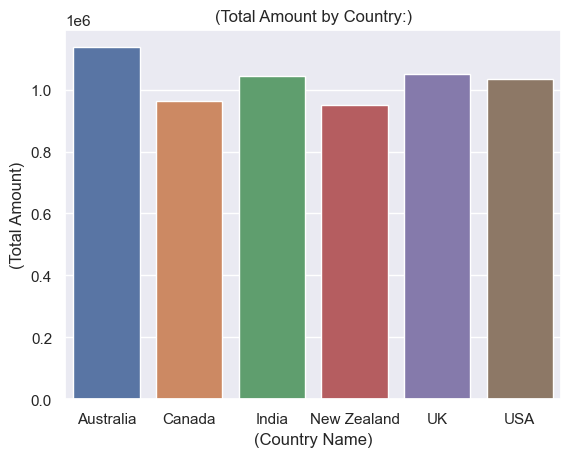

In [566]:
sns.barplot(x= data.groupby(by= "Country")["Amount_d"].sum().index, y= data.groupby(by= "Country")["Amount_d"].sum().values, color= "yellow", edgecolor= "white", palette= "deep", hue= data.groupby(by= "Country")["Amount_d"].sum().index, legend= False)
plt.title("(Total Amount by Country:)")
plt.xlabel("(Country Name)")
plt.ylabel("(Total Amount)")
plt.show()

----

##### 5. **Most Efficient Salesperson:**

In [567]:
data.groupby(by= "Sales Person")["Amount_d"].sum().sort_values(ascending= False).head(5)

Sales Person
Ches Bonnell       320901.0
Oby Sorrel         316645.0
Madelene Upcott    316099.0
Brien Boise        312816.0
Kelci Walkden      311710.0
Name: Amount_d, dtype: float64

C:\Users\MyMachine\AppData\Local\Temp\ipykernel_3960\3862904279.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(y= data.groupby(by= "Sales Person")["Amount_d"].sum().sort_values(ascending= False).head(5).index, x= data.groupby(by= "Sales Person")["Amount_d"].sum().sort_values(ascending= False).head(5).values, color= "skyblue", edgecolor= "black", palette="deep")


Text(0, 0.5, 'Sales Person')

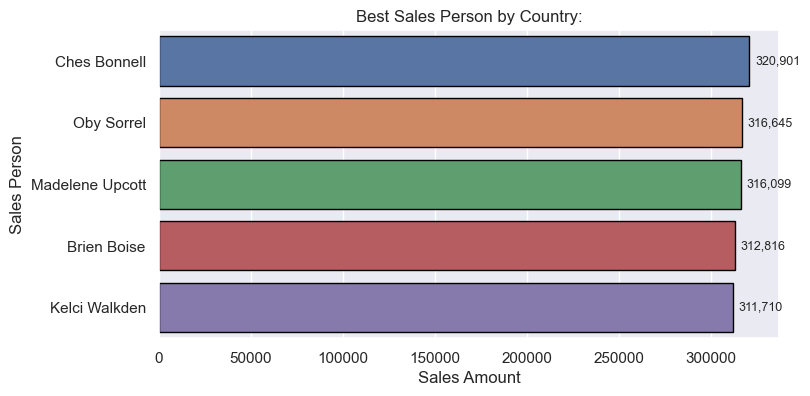

In [568]:
plt.figure(figsize= (8, 4))
ax= sns.barplot(y= data.groupby(by= "Sales Person")["Amount_d"].sum().sort_values(ascending= False).head(5).index, x= data.groupby(by= "Sales Person")["Amount_d"].sum().sort_values(ascending= False).head(5).values, color= "skyblue", edgecolor= "black", palette="deep")

# Loop through each bar (patch) and annotate with the actual value
for p in ax.patches:
    width = p.get_width()
    # Calculate the y position at the center of the bar
    y_coord = p.get_y() + p.get_height() / 2
    # Add a small horizontal offset from the end of the bar
    ax.text(width + (width * 0.01), y_coord, f'{width:,.0f}', ha='left', va='center', fontsize=9)

plt.title("Best Sales Person by Country:")
plt.xlabel("Sales Amount")
plt.ylabel("Sales Person")

-----

##### 6. **Seasonal Peaks:**	Group by month, identify sales spikes — useful for planning campaigns.

In [569]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [570]:
dataa= data.groupby(by= 'month',)["Amount_d"].sum().reset_index()
dataa

,month,Amount_d
0,Apr,674051.0
1,Aug,743148.0
2,Feb,699377.0
3,Jan,896105.0
4,Jul,803425.0
5,Jun,865144.0
6,Mar,749483.0
7,May,752892.0


In [571]:
mon= ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [572]:
# Convert the datatype of months column to categorical:
dataa['month'] = pd.Categorical(dataa['month'], categories=mon, ordered=True).sort_values(ascending= True)

In [573]:
dataa

,month,Amount_d
0,Jan,674051.0
1,Feb,743148.0
2,Mar,699377.0
3,Apr,896105.0
4,May,803425.0
5,Jun,865144.0
6,Jul,749483.0
7,Aug,752892.0


C:\Users\MyMachine\AppData\Local\Temp\ipykernel_3960\4053608469.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= dataa, x= "month", y= "Amount_d", color= "blue", saturation= 0.5, palette="deep",)


<Axes: xlabel='month', ylabel='Amount_d'>

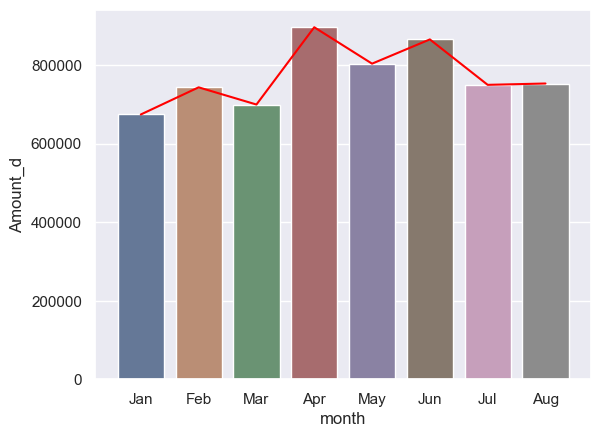

In [574]:
sns.barplot(data= dataa, x= "month", y= "Amount_d", color= "blue", saturation= 0.5, palette="deep",)
sns.lineplot(data= dataa, x= "month", y= "Amount_d", color= "red")

-----

##### 8. **Revenue per Shipment Unit:**

In [575]:
data.head()

,Sales Person,Country,Product,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
Date,,,,,,,,,,
2022-01-03,Marney O'Breen,Australia,Smooth Sliky Salty,"$3,745",170,3745.0,Jan,2022,Monday,1
2022-01-03,Andria Kimpton,Canada,Caramel Stuffed Bars,"$7,154",348,7154.0,Jan,2022,Monday,1
2022-01-03,Marney O'Breen,Canada,Spicy Special Slims,"$3,528",336,3528.0,Jan,2022,Monday,1
2022-01-03,Ches Bonnell,UK,White Choc,"$3,269",226,3269.0,Jan,2022,Monday,1
2022-01-03,Dotty Strutley,UK,99% Dark & Pure,"$9,310",282,9310.0,Jan,2022,Monday,1


In [576]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [577]:
# Overall revanue per shipped box:
overall_revanue_per_shipped_box= data["Amount_d"].sum()/ data["Boxes Shipped"].sum()
print("Overall revenue per shipped box: ", overall_revanue_per_shipped_box)

Overall revenue per shipped box:  34.93435287869971


In [578]:
# Revanue per shipment:
rev_per_ship= data["Amount_d"].sum()/ data["Boxes Shipped"].count()
print(f"Revenue per shipment: ${rev_per_ship:.2f}")

Revenue per shipment: $5652.31


In [579]:
# Revanue per shipped box per  month:
def helper(data):
    return data["Amount_d"].sum()/ data["Boxes Shipped"].sum()
rev_per_mon= data.groupby(by= "month")[["Amount_d", "Boxes Shipped"]].apply(helper).sort_values(ascending= False)

In [580]:
print(F"Revvenue Per Shipment per Month:\n {rev_per_mon}")

Revvenue Per Shipment per Month:
 month
Feb    38.821926
Mar    38.315168
Aug    37.342244
Jul    35.120869
May    34.447840
Jun    32.945316
Jan    32.544216
Apr    32.093082
dtype: float64


------

##### 9. **Low Margin Products:**	

Find products with low revenue per box.

In [581]:
data.head()

,Sales Person,Country,Product,Amount,Boxes Shipped,Amount_d,month,year,day_of_week,quarter
Date,,,,,,,,,,
2022-01-03,Marney O'Breen,Australia,Smooth Sliky Salty,"$3,745",170,3745.0,Jan,2022,Monday,1
2022-01-03,Andria Kimpton,Canada,Caramel Stuffed Bars,"$7,154",348,7154.0,Jan,2022,Monday,1
2022-01-03,Marney O'Breen,Canada,Spicy Special Slims,"$3,528",336,3528.0,Jan,2022,Monday,1
2022-01-03,Ches Bonnell,UK,White Choc,"$3,269",226,3269.0,Jan,2022,Monday,1
2022-01-03,Dotty Strutley,UK,99% Dark & Pure,"$9,310",282,9310.0,Jan,2022,Monday,1


In [582]:
def helper(data):
    total_amt= data["Amount_d"].sum()
    totaL_boxes= data["Boxes Shipped"].sum()
    return total_amt/ totaL_boxes

data.groupby(by= "Product").apply(helper).sort_values(ascending= True)

C:\Users\MyMachine\AppData\Local\Temp\ipykernel_3960\3882967893.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data.groupby(by= "Product").apply(helper).sort_values(ascending= True)


Product
70% Dark Bites          26.401747
Caramel Stuffed Bars    26.567397
Drinking Coco           29.636836
After Nines             31.649631
Milk Bars               32.322689
Orange Choco            33.127781
Fruit & Nut Bars        33.490178
Spicy Special Slims     33.788601
Mint Chip Choco         34.600829
50% Dark Bites          34.897059
Manuka Honey Choco      35.412029
Baker's Choco Chips     35.669191
Eclairs                 35.679456
99% Dark & Pure         36.888889
Raspberry Choco         37.208714
Choco Coated Almonds    37.358601
Organic Choco Syrup     38.030714
85% Dark Bars           38.397151
Peanut Butter Cubes     39.118738
Smooth Sliky Salty      39.692622
White Choc              39.945024
Almond Choco            41.201900
dtype: float64

`70% Dark Bite`, `Caramel Stuffed Bars` are the potential low margin Products.

-----

10. **Sales Consistency per Country:**	  

Standard deviation or trend per country to show market stability.

In [583]:
data.columns

Index(['Sales Person', 'Country', 'Product', 'Amount', 'Boxes Shipped',
       'Amount_d', 'month', 'year', 'day_of_week', 'quarter'],
      dtype='object')

In [584]:
data.groupby(by= "Country")["Amount_d"].std()

Country
Australia      3800.387283
Canada         3888.961411
India          4362.832078
New Zealand    3942.993373
UK             4176.176290
USA            4464.216399
Name: Amount_d, dtype: float64

 | **Country**    | **Std (Amount_d)** | **Interpretation**                     |
|----------------|-------------------|----------------------------------------|
| USA            | 4464.21           | **Highest variability** (big spending differences) |
| India          | 4362.83           | **Very high variability** (similar to USA) |
| UK             | 4176.18           | Moderate-high variability |
| New Zealand    | 3942.99           | Moderate variability |
| Canada         | 3888.96           | **Low variability** (more consistent amounts) |
| Australia      | 3800.39           | **Lowest variability** (most uniform) |

---

11. **Revenue Concentration Risk:**	  

If one country contributes >50%, it's risky — suggest diversification.

In [585]:
def helper(group): 
    total_rev= data["Amount_d"].sum()
    return group["Amount_d"].sum()/total_rev*100

In [586]:
data.groupby(by= "Country").apply(helper)

C:\Users\MyMachine\AppData\Local\Temp\ipykernel_3960\2693782819.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data.groupby(by= "Country").apply(helper)


Country
Australia      18.393208
Canada         15.571756
India          16.912410
New Zealand    15.369917
UK             17.009311
USA            16.743399
dtype: float64

Revenue is perfectly diversified and no need of further diversification.